In [1737]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')


In [1738]:
ele_data=pd.read_excel('C:/Users/hp/Desktop/python/Election_Data.xlsx')

In [1739]:
ele_data.head()

Unnamed: 0    vote  age  economic.cond.national  economic.cond.household  \
0           1  Labour   43                       3                        3   
1           2  Labour   36                       4                        4   
2           3  Labour   35                       4                        4   
3           4  Labour   24                       4                        2   
4           5  Labour   41                       2                        2   

   Blair  Hague  Europe  political.knowledge  gender  
0      4      1       2                    2  female  
1      4      4       5                    2    male  
2      5      2       3                    2    male  
3      2      1       4                    0  female  
4      1      1       6                    2    male

In [1740]:
ele_data.tail()

Unnamed: 0          vote  age  economic.cond.national  \
1520        1521  Conservative   67                       5   
1521        1522  Conservative   73                       2   
1522        1523        Labour   37                       3   
1523        1524  Conservative   61                       3   
1524        1525  Conservative   74                       2   

      economic.cond.household  Blair  Hague  Europe  political.knowledge  \
1520                        3      2      4      11                    3   
1521                        2      4      4       8                    2   
1522                        3      5      4       2                    2   
1523                        3      1      4      11                    2   
1524                        3      2      4      11                    0   

      gender  
1520    male  
1521    male  
1522    male  
1523    male  
1524  female

In [1741]:
ele_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [1742]:
print('Number of Rows in a Dataset = ',ele_data.shape[0])
print('Number of Columns in a Dataset = ',ele_data.shape[1])

Number of Rows in a Dataset =  1525
Number of Columns in a Dataset =  10


In [1743]:
ele_data.describe(include='all').T

count unique     top  freq       mean         std  \
Unnamed: 0               1525.0    NaN     NaN   NaN      763.0  440.373894   
vote                       1525      2  Labour  1063        NaN         NaN   
age                      1525.0    NaN     NaN   NaN  54.182295   15.711209   
economic.cond.national   1525.0    NaN     NaN   NaN   3.245902    0.880969   
economic.cond.household  1525.0    NaN     NaN   NaN   3.140328    0.929951   
Blair                    1525.0    NaN     NaN   NaN   3.334426    1.174824   
Hague                    1525.0    NaN     NaN   NaN   2.746885    1.230703   
Europe                   1525.0    NaN     NaN   NaN   6.728525    3.297538   
political.knowledge      1525.0    NaN     NaN   NaN   1.542295    1.083315   
gender                     1525      2  female   812        NaN         NaN   

                          min    25%    50%     75%     max  
Unnamed: 0                1.0  382.0  763.0  1144.0  1525.0  
vote                      NaN    NaN    NaN     NaN     NaN  
age                      24.0   41.0   53.0    67.0    93.0  
economic.cond.national    1.0    3.0    3.0     4.0     5.0  
economic.cond.household   1.0    3.0    3.0     4.0     5.0  
Blair                     1.0    2.0    4.0     4.0     5.0  
Hague                     1.0    2.0    2.0     4.0     5.0  
Europe                    1.0    4.0    6.0    10.0    11.0  
political.knowledge       0.0    0.0    2.0     2.0     3.0  
gender                    NaN    NaN    NaN     NaN     NaN

In [1744]:
ele_data.rename(columns={'economic.cond.national':'economic_cond_national','economic.cond.household':'economic_cond_household','political.knowledge':'political_knowledge'},inplace=True)

In [1745]:
ele_data.drop('Unnamed: 0',axis=1,inplace=True)

In [1746]:
print('Total number of Null Entries in each columns -')
ele_data.isnull().sum()


Total number of Null Entries in each columns -


vote                       0
age                        0
economic_cond_national     0
economic_cond_household    0
Blair                      0
Hague                      0
Europe                     0
political_knowledge        0
gender                     0
dtype: int64

In [1747]:
print('Total number of duplicated data/ rows in a dataset = ',ele_data.duplicated().sum())
ele_data[ele_data.duplicated()]

Total number of duplicated data/ rows in a dataset =  8


vote  age  economic_cond_national  economic_cond_household  \
67          Labour   35                       4                        4   
626         Labour   39                       3                        4   
870         Labour   38                       2                        4   
983   Conservative   74                       4                        3   
1154  Conservative   53                       3                        4   
1236        Labour   36                       3                        3   
1244        Labour   29                       4                        4   
1438        Labour   40                       4                        3   

      Blair  Hague  Europe  political_knowledge  gender  
67        5      2       3                    2    male  
626       4      2       5                    2    male  
870       2      2       4                    3    male  
983       2      4       8                    2  female  
1154      2      2       6                    0  female  
1236      2      2       6                    2  female  
1244      4      2       2                    2  female  
1438      4      2       2                    2    male

In [1748]:
# dropping duplicated data/rows
ele_data.drop_duplicates(inplace=True)

In [1749]:
print('Total number of duplicated data/ rows in a dataset = ',ele_data.duplicated().sum())
ele_data[ele_data.duplicated()]

Total number of duplicated data/ rows in a dataset =  0


Empty DataFrame
Columns: [vote, age, economic_cond_national, economic_cond_household, Blair, Hague, Europe, political_knowledge, gender]
Index: []

In [1750]:
cat_col=ele_data.select_dtypes(include='object')
num_col=ele_data.select_dtypes(exclude='object')

In [1751]:
num_col.skew()

age                        0.139800
economic_cond_national    -0.238474
economic_cond_household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political_knowledge       -0.422928
dtype: float64

In [1627]:
for i in cat_col.columns:
    print(i.upper(),cat_col[i].nunique())
    print(cat_col[i].value_counts(),'\n')

VOTE 2
Labour          1057
Conservative     460
Name: vote, dtype: int64 

GENDER 2
female    808
male      709
Name: gender, dtype: int64 



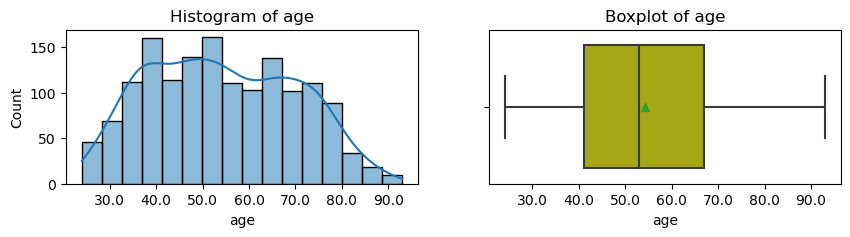

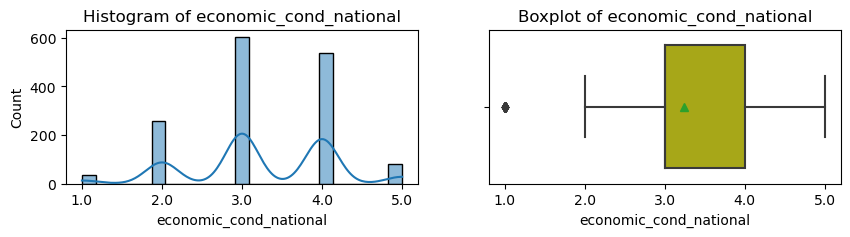

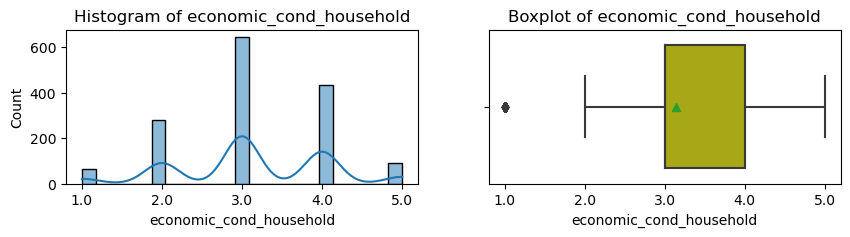

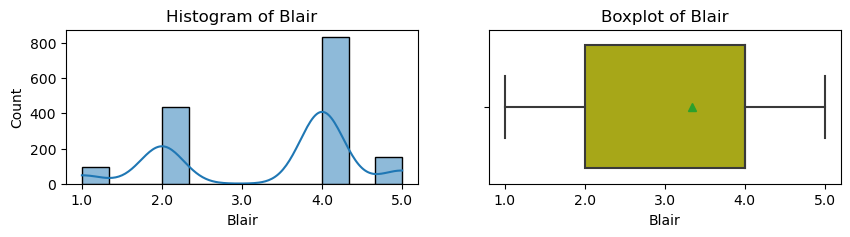

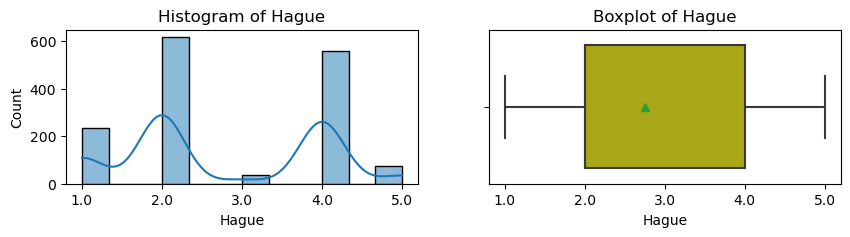

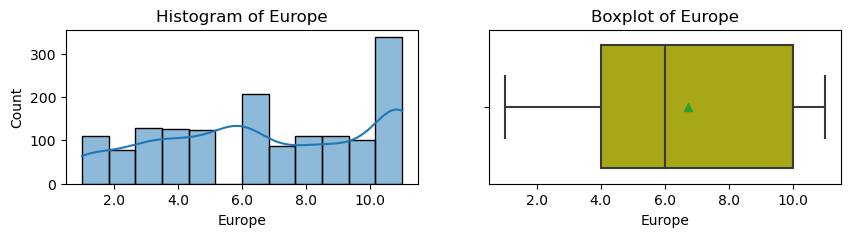

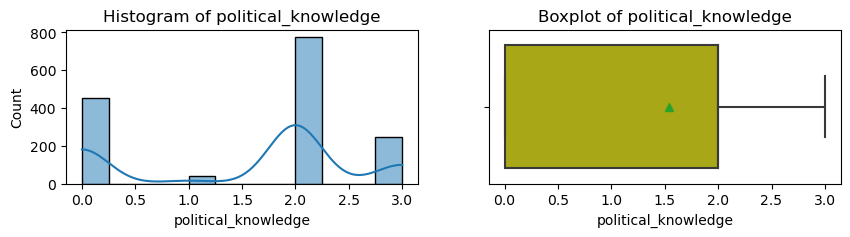

In [1628]:
for x in num_col.columns:
    fig,axes=plt.subplots(1,2,figsize=(10,2))
    a=sns.histplot(num_col,x=num_col[x],kde=True,ax=axes[0])
    a.set_xticklabels(a.get_xticks())
    a.set_title('Histogram of {}'.format(x))
    b=sns.boxplot(num_col,x=num_col[x],showmeans=True,color='y',ax=axes[1])
    b.set_xticklabels(b.get_xticks())
    b.set_title('Boxplot of {}'.format(x))
    plt.savefig('categorical datatypes1.png')

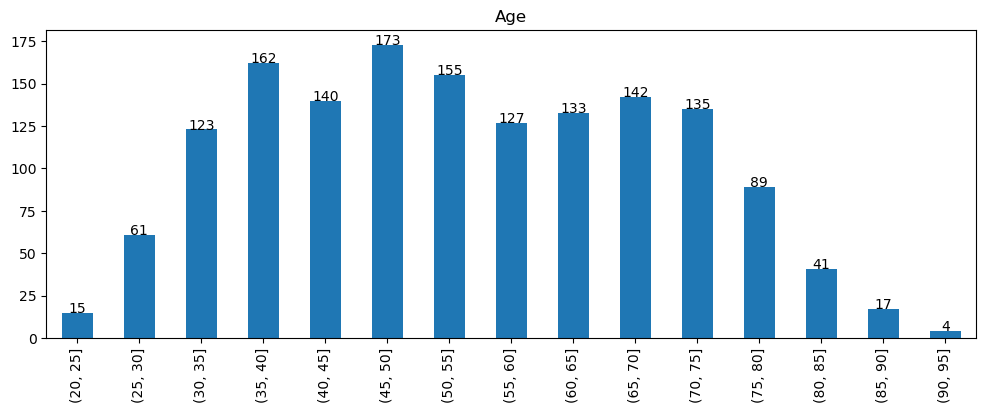

In [1629]:
fig,ax=plt.subplots(figsize=(12,4))
(pd.cut(ele_data.age,bins=range(20,100,5)).value_counts().sort_index().plot.bar(ax=ax))
for a in ax.patches:
    ax.annotate('{}'.format(a.get_height()),xy=(a.get_x()+0.25,a.get_height()+0.1),ha='center')
plt.title('Age');

Text(0.5, 1.0, 'Count plot of economic_cond_national')

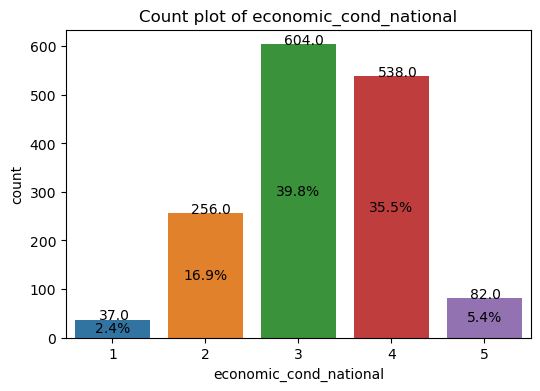

In [1630]:
#sns.countplot(x=num_col['economic.cond.national']);
plt.figure(figsize=[6,4])
ax=sns.countplot(data=ele_data,x='economic_cond_national')
for c in ax.containers:
    labels=[f'{h/ele_data.economic_cond_national.count()*100:0.1f}%' if(h:=v.get_height())>0 else '' for v in c]
    ax.bar_label(c,labels=labels,label_type='center')
for p in ax.patches:
    plt.annotate('{}'.format(p.get_height()),(p.get_x()+0.25,p.get_height()+0.01))
plt.title('Count plot of economic_cond_national')

Text(0.5, 1.0, 'Bi-variate Analysis between Economic Condition National and gender')

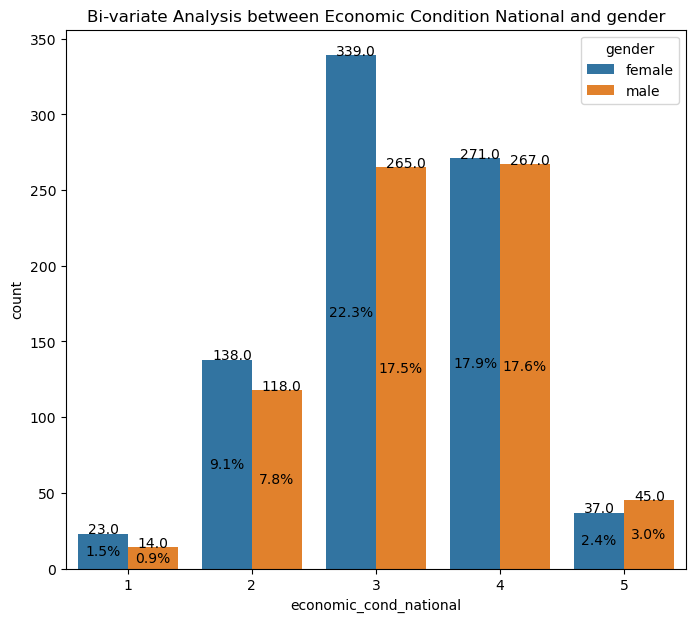

In [1631]:
plt.figure(figsize=[8,7])
ax=sns.countplot(data=ele_data,x='economic_cond_national',hue='gender')
for c in ax.containers:
    labels=[f'{h/ele_data.economic_cond_national.count()*100:0.1f}%' if(h:=v.get_height())>0 else '' for v in c]
    ax.bar_label(c,labels=labels,label_type='center')
for p in ax.patches:
    plt.annotate('{}'.format(p.get_height()),(p.get_x()+0.08,p.get_height()+0.01))
plt.title('Bi-variate Analysis between Economic Condition National and gender')

Text(0.5, 1.0, 'Bi-variate Analysis between Economic Condition National and Vote')

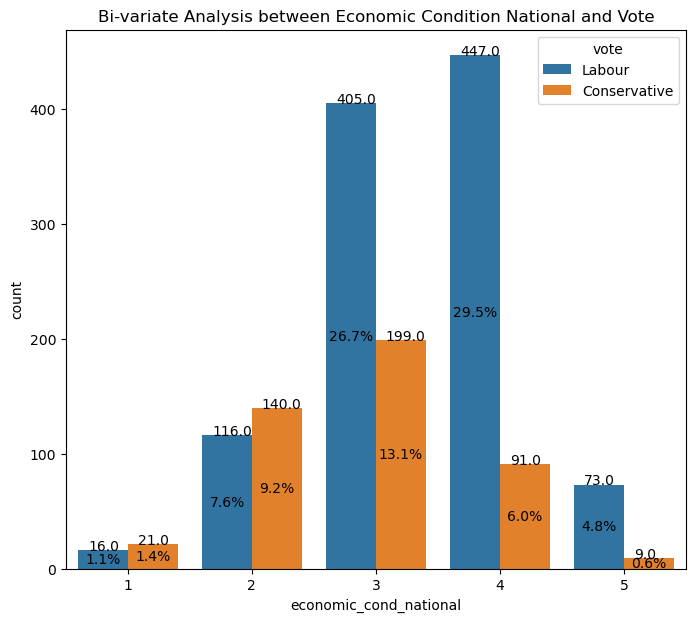

In [1632]:
plt.figure(figsize=[8,7])
ax=sns.countplot(data=ele_data,x='economic_cond_national',hue='vote')
for c in ax.containers:
    labels=[f'{h/ele_data.economic_cond_national.count()*100:0.1f}%' if(h:=v.get_height())>0 else '' for v in c]
    ax.bar_label(c,labels=labels,label_type='center')
for p in ax.patches:
    plt.annotate('{}'.format(p.get_height()),(p.get_x()+0.08,p.get_height()+0.01))
plt.title('Bi-variate Analysis between Economic Condition National and Vote')

Text(0.5, 1.0, 'Count plot of economic_condition_household')

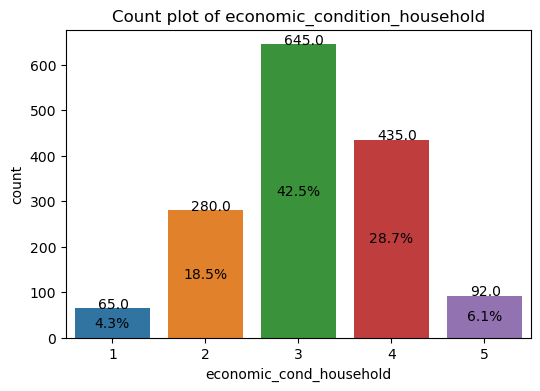

In [1633]:
#sns.countplot(x=num_col['economic.cond.household']);
plt.figure(figsize=[6,4])
ax=sns.countplot(data=ele_data,x='economic_cond_household')
for c in ax.containers:
    labels=[f'{h/ele_data.economic_cond_household.count()*100:0.1f}%' if(h:=v.get_height())>0 else '' for v in c]
    ax.bar_label(c,labels=labels,label_type='center')
for p in ax.patches:
    plt.annotate('{}'.format(p.get_height()),(p.get_x()+0.25,p.get_height()+0.01))
plt.title('Count plot of economic_condition_household')

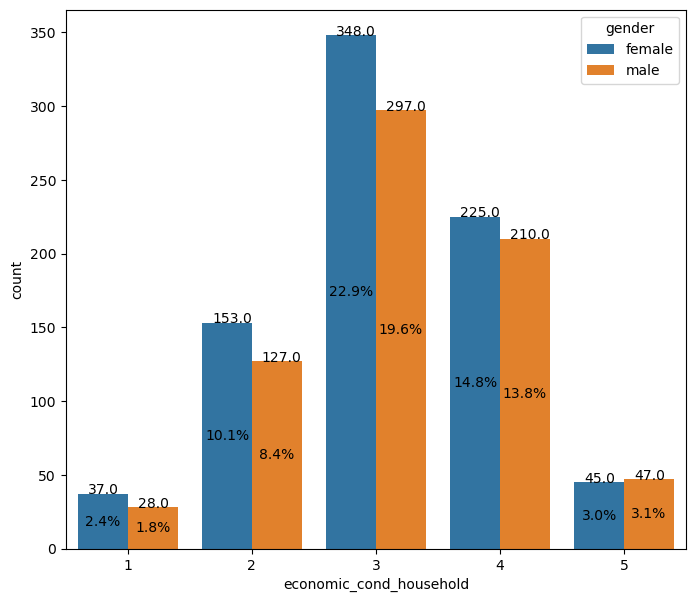

In [1634]:
plt.figure(figsize=[8,7])
ax=sns.countplot(data=ele_data,x='economic_cond_household',hue='gender')
for c in ax.containers:
    labels=[f'{h/ele_data.economic_cond_household.count()*100:0.1f}%' if(h:=v.get_height())>0 else '' for v in c]
    ax.bar_label(c,labels=labels,label_type='center')
for p in ax.patches:
    plt.annotate('{}'.format(p.get_height()),(p.get_x()+0.08,p.get_height()+0.01))

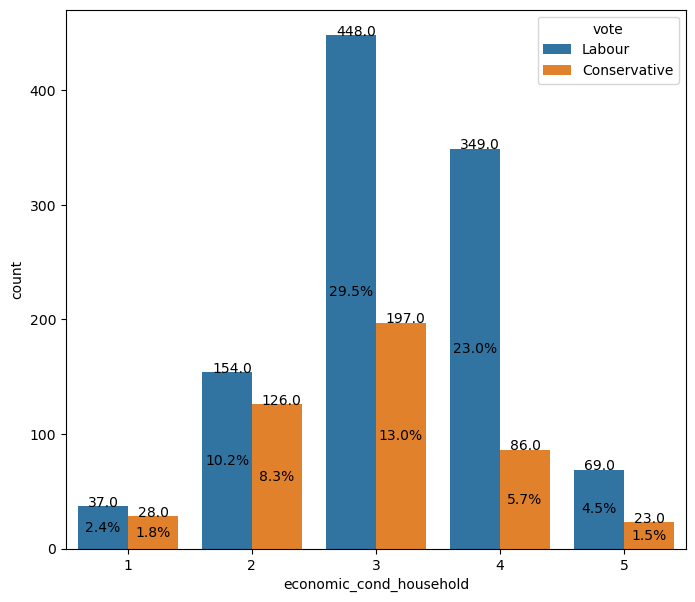

In [1635]:
plt.figure(figsize=[8,7])
ax=sns.countplot(data=ele_data,x='economic_cond_household',hue='vote')
for c in ax.containers:
    labels=[f'{h/ele_data.economic_cond_household.count()*100:0.1f}%' if(h:=v.get_height())>0 else '' for v in c]
    ax.bar_label(c,labels=labels,label_type='center')
for p in ax.patches:
    plt.annotate('{}'.format(p.get_height()),(p.get_x()+0.08,p.get_height()+0.01))

Text(0.5, 1.0, 'Count plot of Blair')

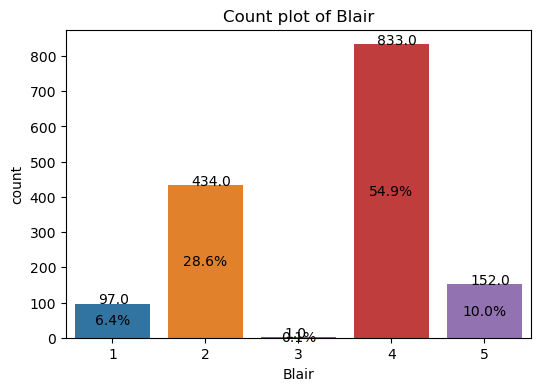

In [1636]:
#sns.countplot(x=num_col['Blair']);
plt.figure(figsize=[6,4])
ax=sns.countplot(data=ele_data,x='Blair')
for c in ax.containers:
    labels=[f'{h/ele_data.Blair.count()*100:0.1f}%' if(h:=v.get_height())>0 else '' for v in c]
    ax.bar_label(c,labels=labels,label_type='center')
for p in ax.patches:
    plt.annotate('{}'.format(p.get_height()),(p.get_x()+0.25,p.get_height()+0.01))
plt.title('Count plot of Blair')

In [1637]:
ele_data.Blair.value_counts()

4    833
2    434
5    152
1     97
3      1
Name: Blair, dtype: int64

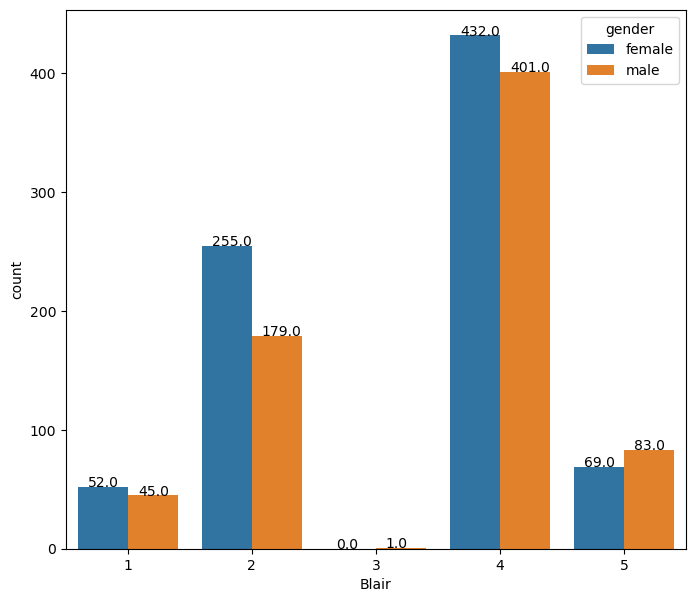

In [1638]:
plt.figure(figsize=[8,7])
ax=sns.countplot(data=ele_data,x='Blair',hue='gender')

for p in ax.patches:
    plt.annotate('{}'.format(p.get_height()),(p.get_x()+0.08,p.get_height()+0.01))

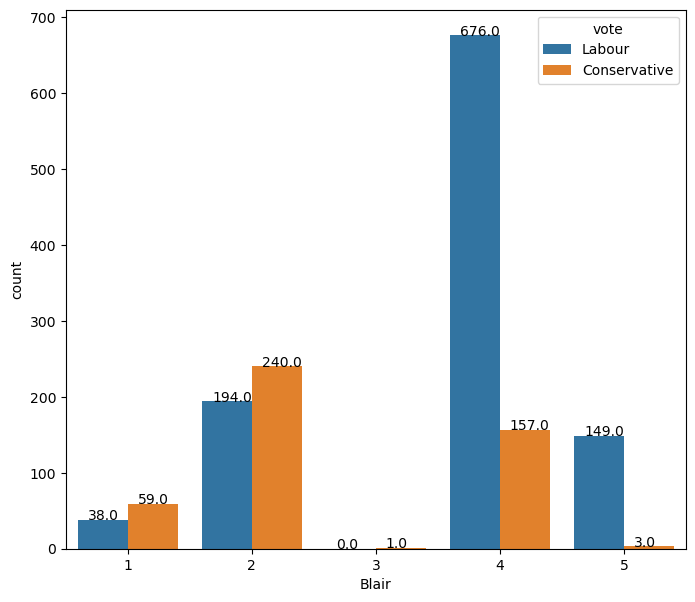

In [1639]:
plt.figure(figsize=[8,7])
ax=sns.countplot(data=ele_data,x='Blair',hue='vote')

for p in ax.patches:
    plt.annotate('{}'.format(p.get_height()),(p.get_x()+0.08,p.get_height()+0.01))

Text(0.5, 1.0, 'Count plot of Hague')

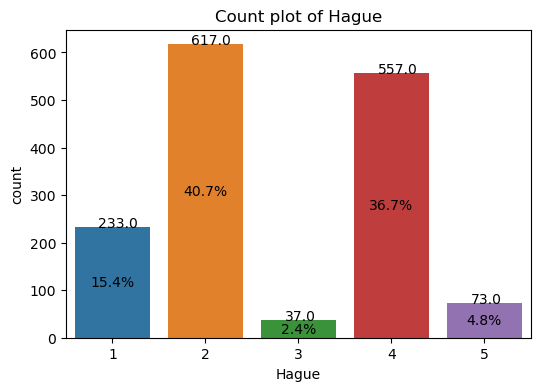

In [1640]:
plt.figure(figsize=[6,4])
ax=sns.countplot(data=ele_data,x='Hague')
for c in ax.containers:
    labels=[f'{h/ele_data.Hague.count()*100:0.1f}%' if(h:=v.get_height())>0 else '' for v in c]
    ax.bar_label(c,labels=labels,label_type='center')
for p in ax.patches:
    plt.annotate('{}'.format(p.get_height()),(p.get_x()+0.25,p.get_height()+0.01))
plt.title('Count plot of Hague')

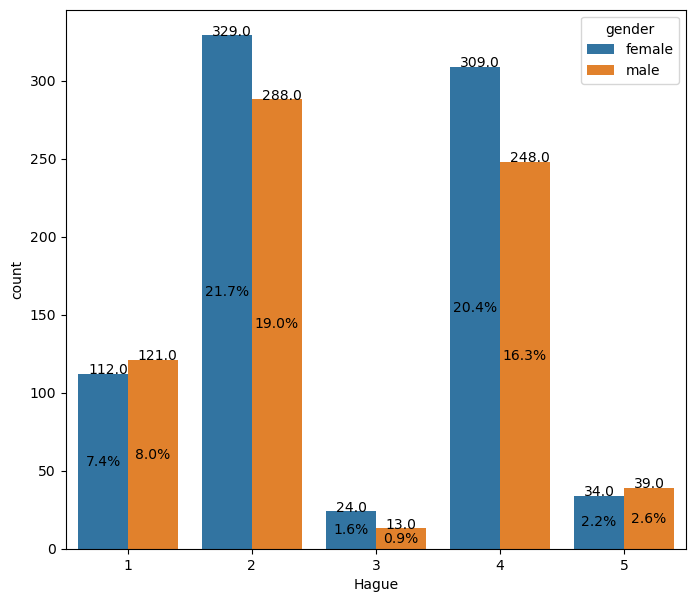

In [1641]:
plt.figure(figsize=[8,7])
ax=sns.countplot(data=ele_data,x='Hague',hue='gender')
for c in ax.containers:
    labels=[f'{h/ele_data.Hague.count()*100:0.1f}%' if(h:=v.get_height())>0 else '' for v in c]
    ax.bar_label(c,labels=labels,label_type='center')
for p in ax.patches:
    plt.annotate('{}'.format(p.get_height()),(p.get_x()+0.08,p.get_height()+0.01))

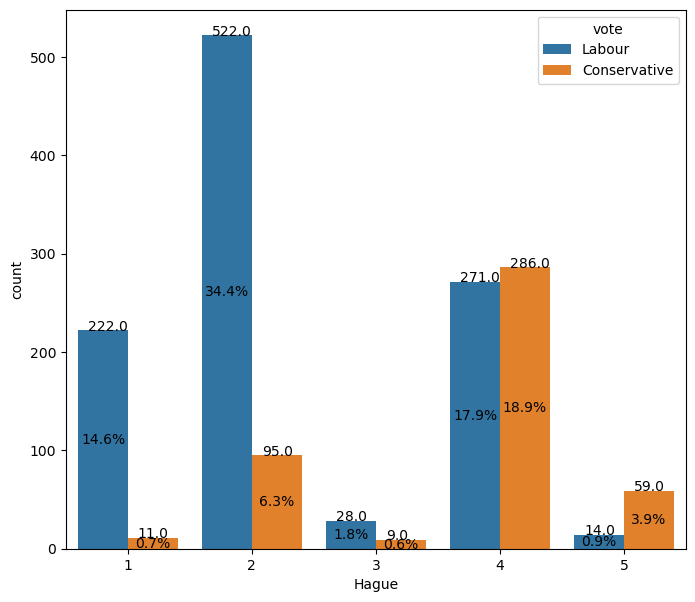

In [1642]:
plt.figure(figsize=[8,7])
ax=sns.countplot(data=ele_data,x='Hague',hue='vote')
for c in ax.containers:
    labels=[f'{h/ele_data.Hague.count()*100:0.1f}%' if(h:=v.get_height())>0 else '' for v in c]
    ax.bar_label(c,labels=labels,label_type='center')
for p in ax.patches:
    plt.annotate('{}'.format(p.get_height()),(p.get_x()+0.08,p.get_height()+0.01))

Text(0.5, 1.0, 'Count plot of Europe')

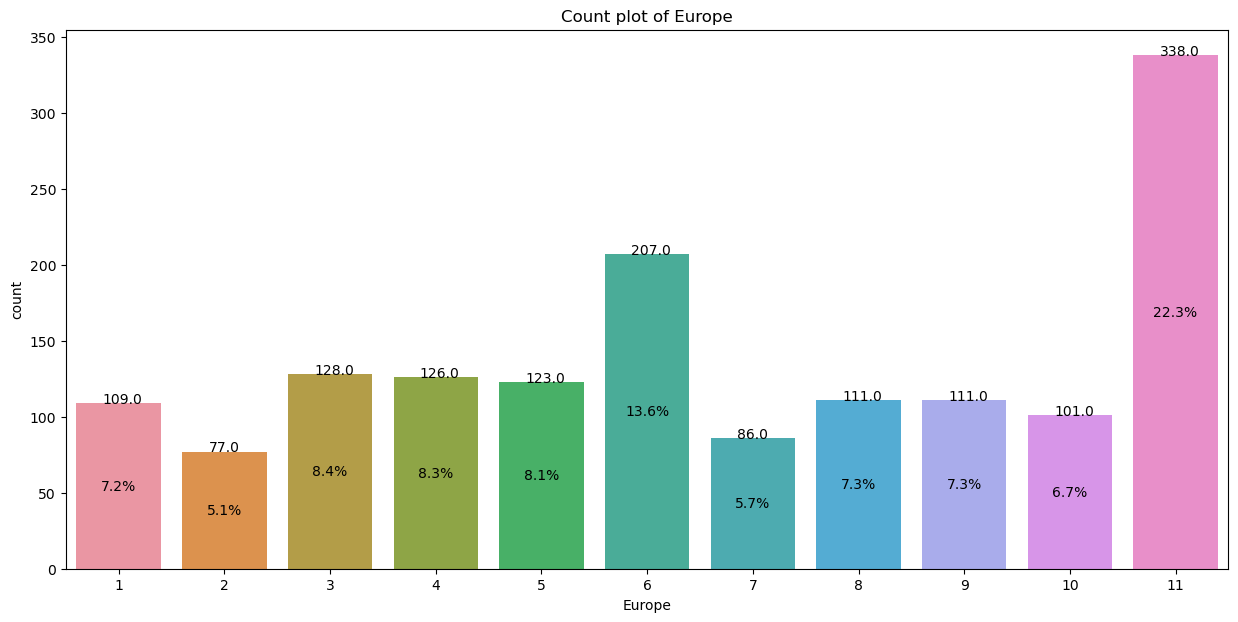

In [1643]:
plt.figure(figsize=[15,7])
ax=sns.countplot(data=ele_data,x='Europe')
for c in ax.containers:
    labels=[f'{h/ele_data.Europe.count()*100:0.1f}%' if(h:=v.get_height())>0 else '' for v in c]
    ax.bar_label(c,labels=labels,label_type='center')
for p in ax.patches:
    plt.annotate('{}'.format(p.get_height()),(p.get_x()+0.25,p.get_height()+0.01))
plt.title('Count plot of Europe')

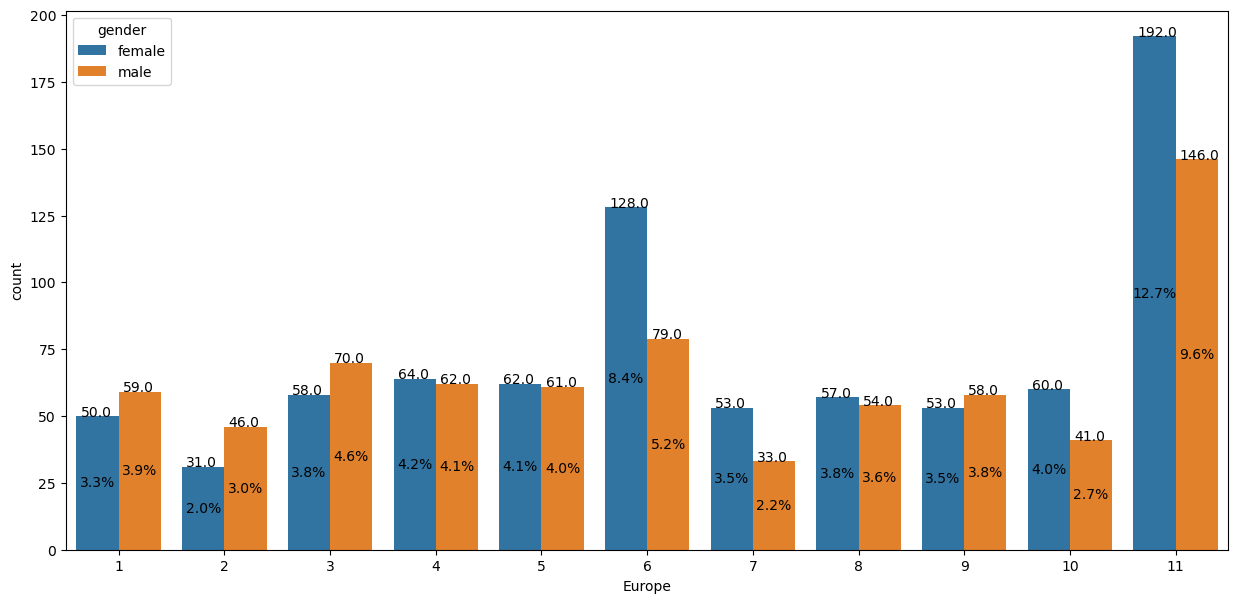

In [1644]:
plt.figure(figsize=[15,7])
ax=sns.countplot(data=ele_data,x='Europe',hue='gender')
for c in ax.containers:
    labels=[f'{h/ele_data.Europe.count()*100:0.1f}%' if(h:=v.get_height())>0 else '' for v in c]
    ax.bar_label(c,labels=labels,label_type='center')
for p in ax.patches:
    plt.annotate('{}'.format(p.get_height()),(p.get_x()+0.04,p.get_height()+0.01))


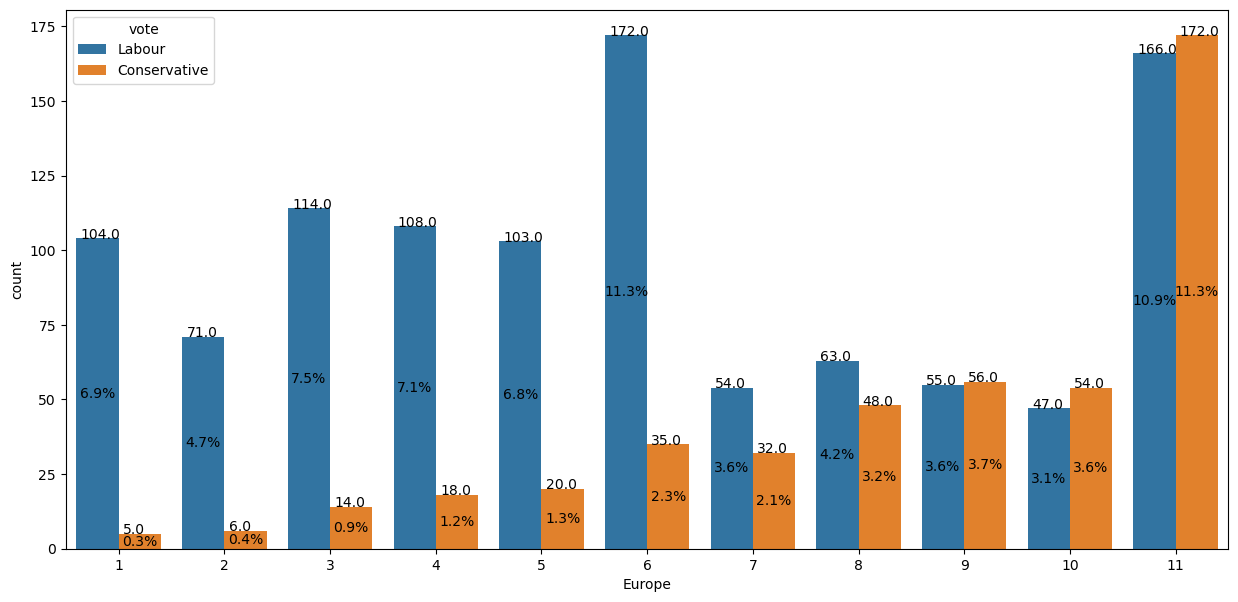

In [1645]:
plt.figure(figsize=[15,7])
ax=sns.countplot(data=ele_data,x='Europe',hue='vote')
for c in ax.containers:
    labels=[f'{h/ele_data.Europe.count()*100:0.1f}%' if(h:=v.get_height())>0 else '' for v in c]
    ax.bar_label(c,labels=labels,label_type='center')
for p in ax.patches:
    plt.annotate('{}'.format(p.get_height()),(p.get_x()+0.04,p.get_height()+0.01))


Text(0.5, 1.0, 'Count plot of Plotical Knowledge')

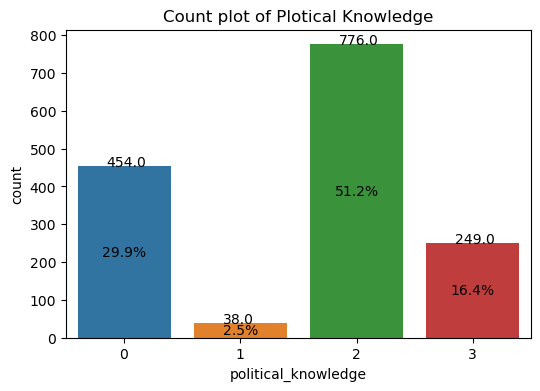

In [1646]:
plt.figure(figsize=[6,4])
ax=sns.countplot(data=ele_data,x='political_knowledge')
for c in ax.containers:
    labels=[f'{h/ele_data.political_knowledge.count()*100:0.1f}%' if(h:=v.get_height())>0 else '' for v in c]
    ax.bar_label(c,labels=labels,label_type='center')
for p in ax.patches:
    plt.annotate('{}'.format(p.get_height()),(p.get_x()+0.25,p.get_height()+0.01))
plt.title('Count plot of Plotical Knowledge')

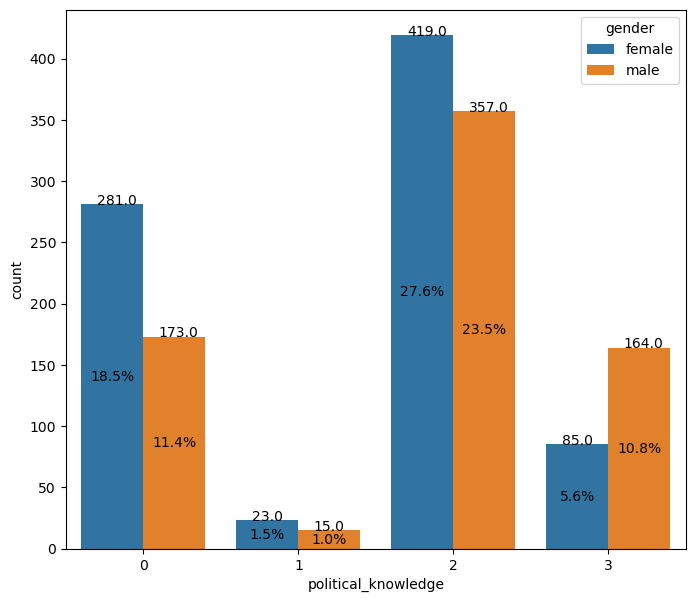

In [1647]:
plt.figure(figsize=[8,7])
ax=sns.countplot(data=ele_data,x='political_knowledge',hue='gender')
for c in ax.containers:
    labels=[f'{h/ele_data.political_knowledge.count()*100:0.1f}%' if(h:=v.get_height())>0 else '' for v in c]
    ax.bar_label(c,labels=labels,label_type='center')
for p in ax.patches:
    plt.annotate('{}'.format(p.get_height()),(p.get_x()+0.10,p.get_height()+0.01))

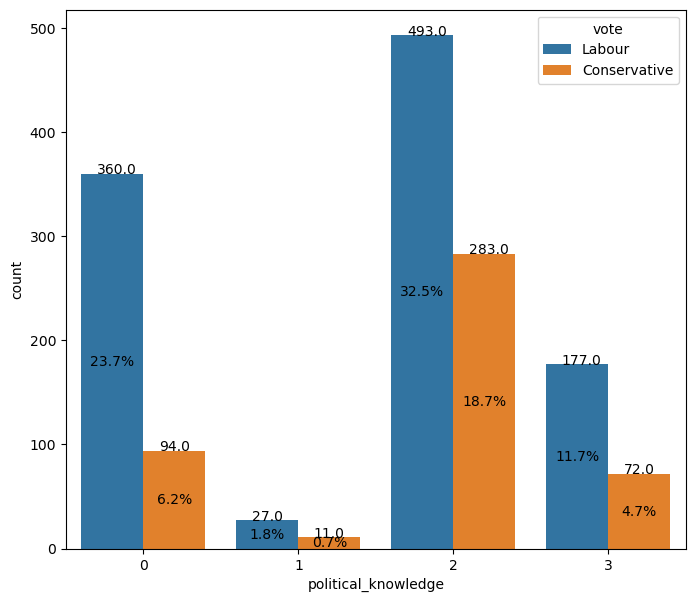

In [1648]:
plt.figure(figsize=[8,7])
ax=sns.countplot(data=ele_data,x='political_knowledge',hue='vote')
for c in ax.containers:
    labels=[f'{h/ele_data.political_knowledge.count()*100:0.1f}%' if(h:=v.get_height())>0 else '' for v in c]
    ax.bar_label(c,labels=labels,label_type='center')
for p in ax.patches:
    plt.annotate('{}'.format(p.get_height()),(p.get_x()+0.10,p.get_height()+0.01))

Text(0.5, 1.0, 'Count plot of Gender')

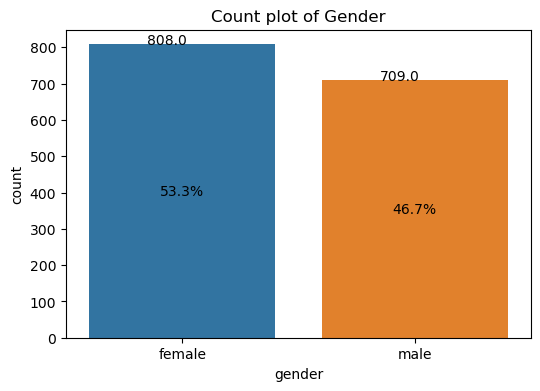

In [1649]:
plt.figure(figsize=[6,4])
ax=sns.countplot(data=ele_data,x='gender')
for c in ax.containers:
    labels=[f'{h/ele_data.gender.count()*100:0.1f}%' if(h:=v.get_height())>0 else '' for v in c]
    ax.bar_label(c,labels=labels,label_type='center')
for p in ax.patches:
    plt.annotate('{}'.format(p.get_height()),(p.get_x()+0.25,p.get_height()+0.01))
plt.title('Count plot of Gender')

Text(0.5, 1.0, 'Count plot of Vote')

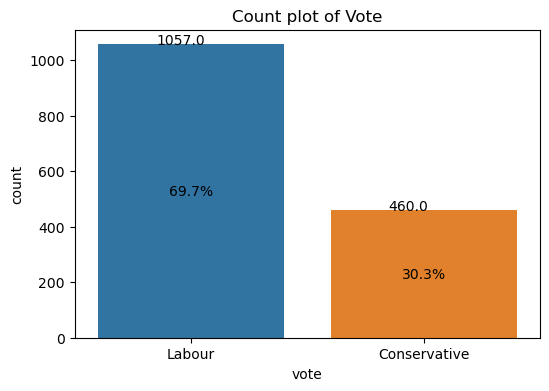

In [1650]:
plt.figure(figsize=[6,4])
ax=sns.countplot(data=ele_data,x='vote')
for c in ax.containers:
    labels=[f'{h/ele_data.vote.count()*100:0.1f}%' if(h:=v.get_height())>0 else '' for v in c]
    ax.bar_label(c,labels=labels,label_type='center')
for p in ax.patches:
    plt.annotate('{}'.format(p.get_height()),(p.get_x()+0.25,p.get_height()+0.01))
plt.title('Count plot of Vote')

Text(0.5, 1.0, 'Bi-Variate Analysis between Vote and Gender')

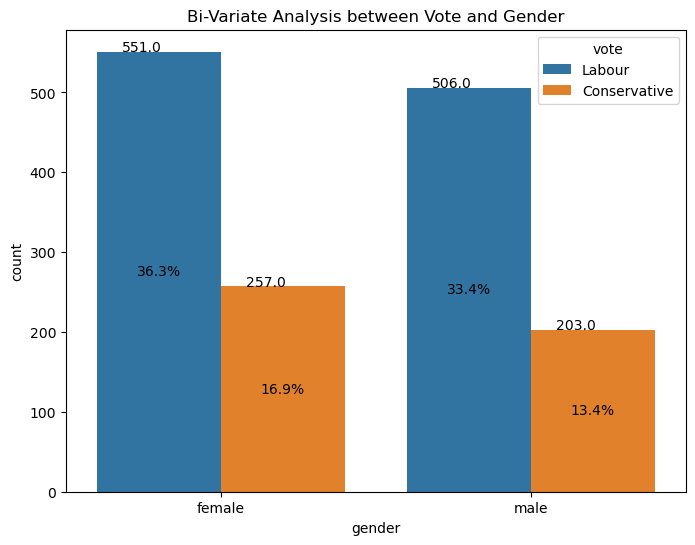

In [1651]:
plt.figure(figsize=[8,6])
ax=sns.countplot(data=ele_data,x='gender',hue='vote')
for c in ax.containers:
    labels=[f'{h/ele_data.gender.count()*100:0.1f}%' if(h:=v.get_height())>0 else '' for v in c]
    ax.bar_label(c,labels=labels,label_type='center')
for p in ax.patches:
    plt.annotate('{}'.format(p.get_height()),(p.get_x()+0.08,p.get_height()+0.01))
plt.title('Bi-Variate Analysis between Vote and Gender')

Text(0.5, 1.0, 'Bi-Variate Analysis between Vote and Gender')

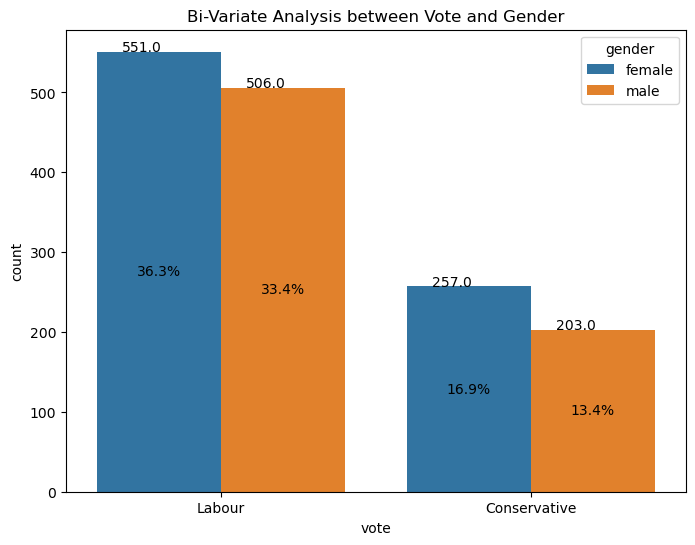

In [1652]:
plt.figure(figsize=[8,6])
ax=sns.countplot(data=ele_data,x='vote',hue='gender')
for c in ax.containers:
    labels=[f'{h/ele_data.vote.count()*100:0.1f}%' if(h:=v.get_height())>0 else '' for v in c]
    ax.bar_label(c,labels=labels,label_type='center')
for p in ax.patches:
    plt.annotate('{}'.format(p.get_height()),(p.get_x()+0.08,p.get_height()+0.01))
plt.title('Bi-Variate Analysis between Vote and Gender')

<Axes: >

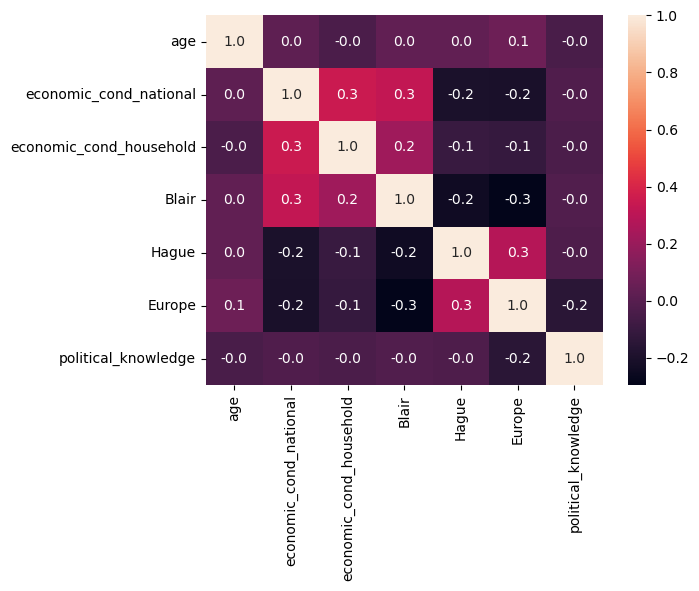

In [1653]:
sns.heatmap(num_col.corr(),annot=True,fmt='.1f')

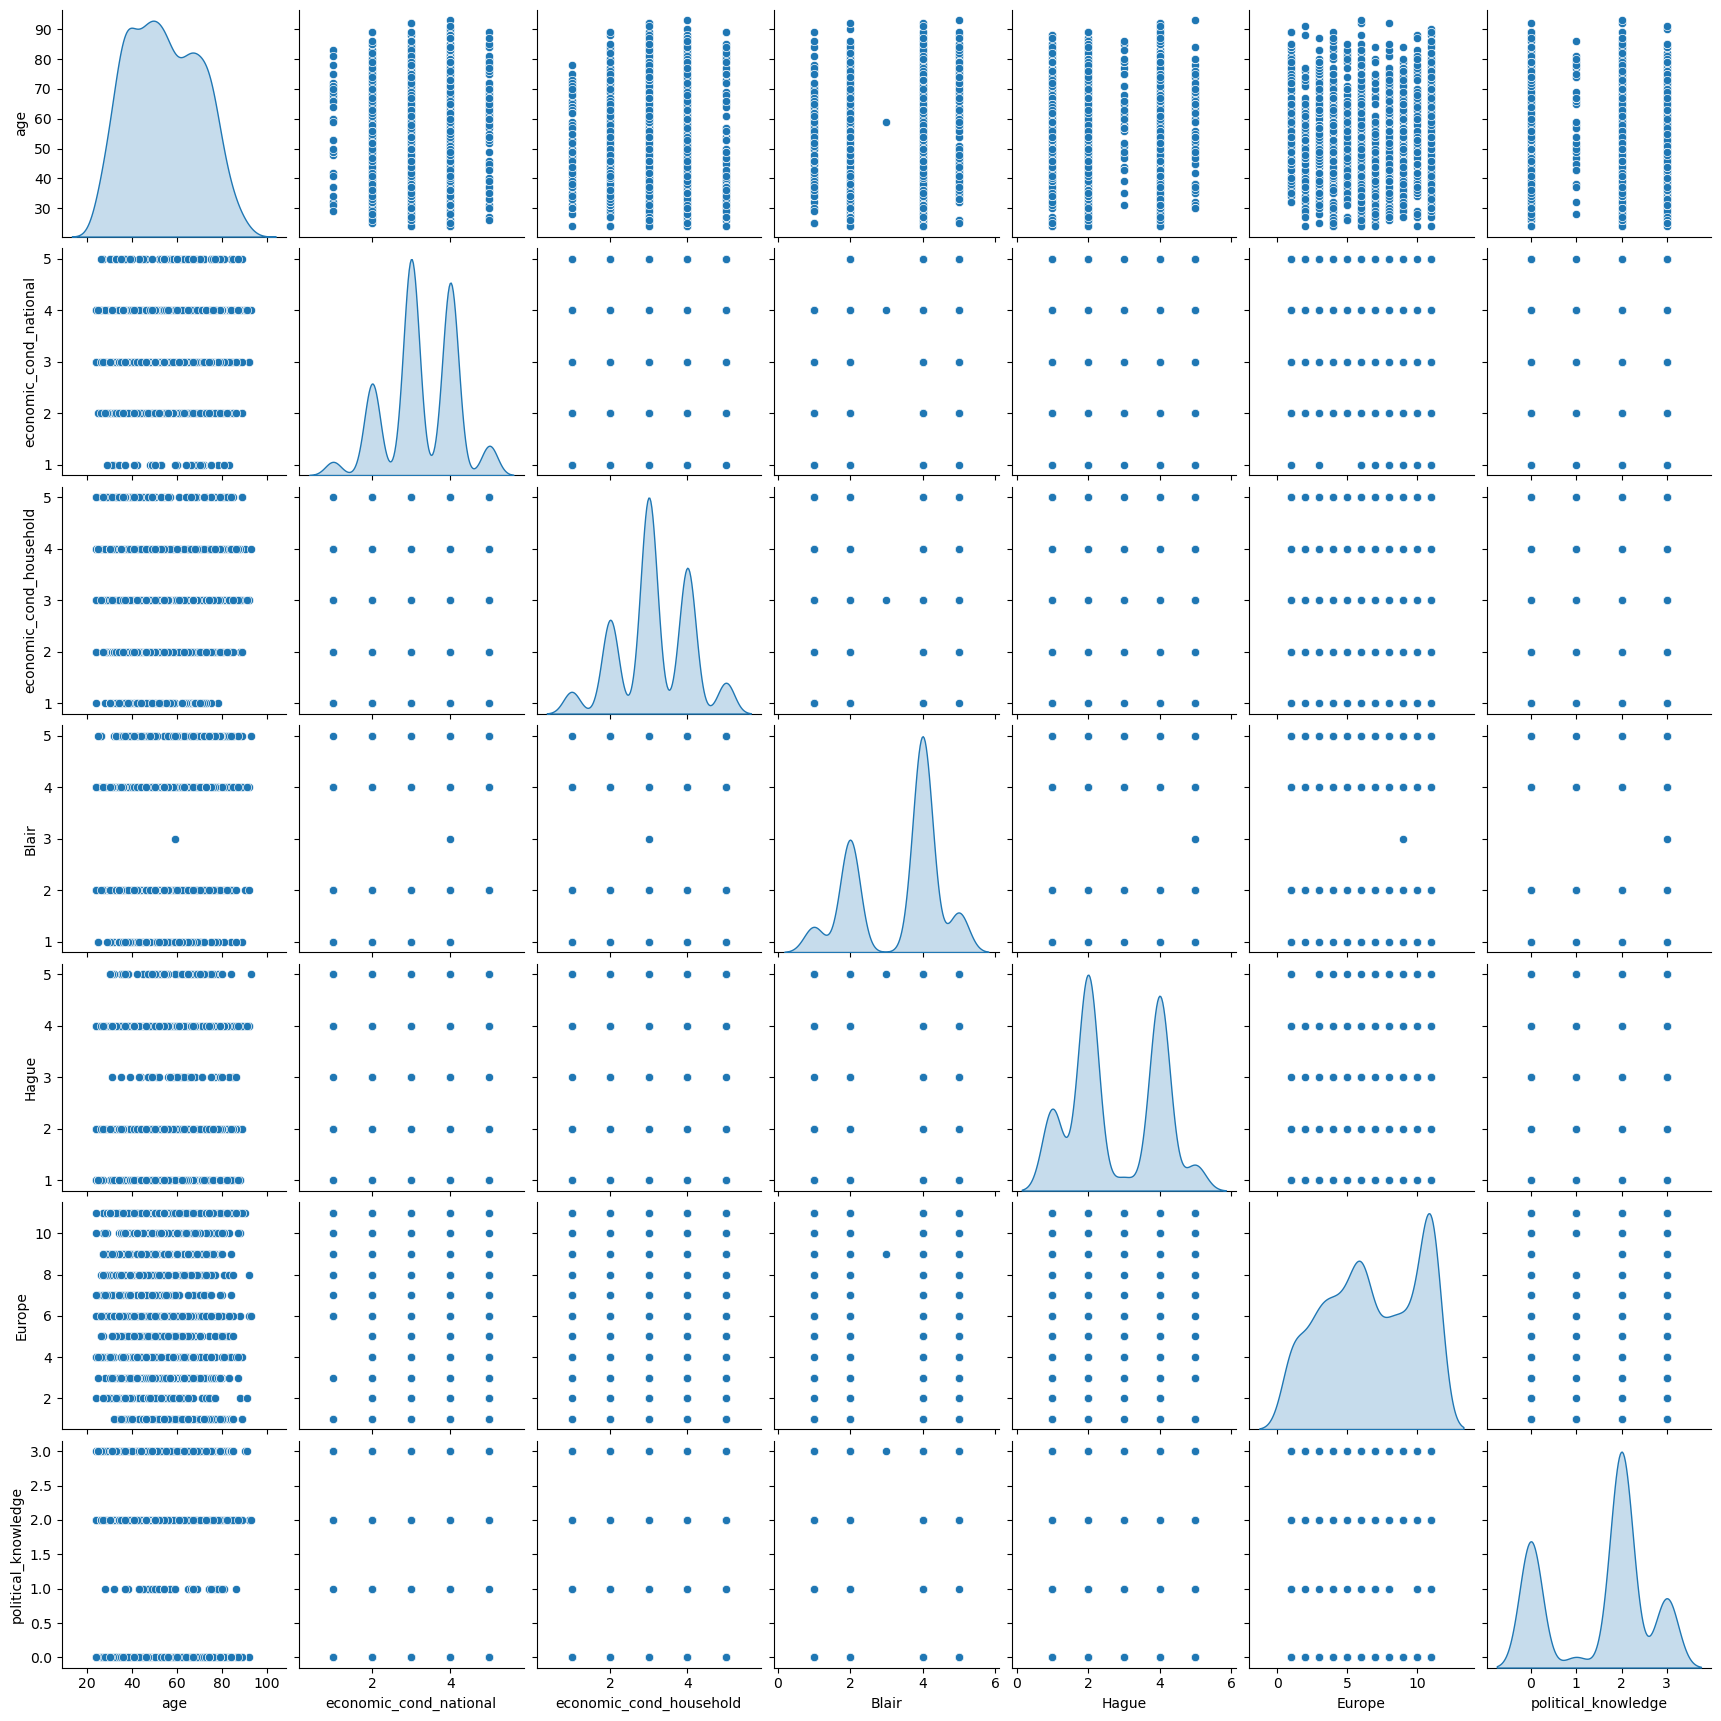

In [1375]:
sns.pairplot(ele_data,diag_kind='kde');
plt.savefig('ele_data_pair.png')

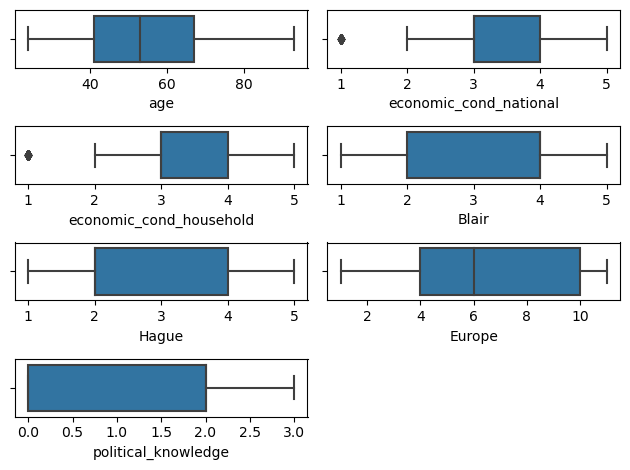

In [1654]:
for x in range(len(num_col.columns)):
    plt.subplot(4,2,x+1)
    sns.boxplot(num_col,x=num_col.columns[x])
    plt.tight_layout()
plt.savefig('ele1_with_outliers.png')

In [1752]:
def remove_outliers(x):
    q1,q3=np.percentile(x,[25,75])
    IQR=q3-q1
    UL=q3+(1.5*IQR)
    LL=q1-(1.5*IQR)
    
    return(UL,LL)

In [1753]:
for i in num_col.columns:
    qul,ll=remove_outliers(num_col[i])
    print('Lower Fence and Upper Fence of {}'.format(i),' = ',round(ll,3),'&', round(ul,3))

Lower Fence and Upper Fence of age  =  2.0 & 5.0
Lower Fence and Upper Fence of economic_cond_national  =  1.5 & 5.0
Lower Fence and Upper Fence of economic_cond_household  =  1.5 & 5.0
Lower Fence and Upper Fence of Blair  =  -1.0 & 5.0
Lower Fence and Upper Fence of Hague  =  -1.0 & 5.0
Lower Fence and Upper Fence of Europe  =  -5.0 & 5.0
Lower Fence and Upper Fence of political_knowledge  =  -3.0 & 5.0


In [1754]:
print('Below you can see the dataset where Economic Condition National is less than Lower Limit :-')
num_col[num_col.economic_cond_household<1.5]


Below you can see the dataset where Economic Condition National is less than Lower Limit :-


age  economic_cond_national  economic_cond_household  Blair  Hague  \
19     37                       3                        1      1      1   
21     53                       2                        1      2      4   
35     41                       3                        1      4      4   
42     66                       1                        1      4      2   
62     28                       4                        1      4      2   
...   ...                     ...                      ...    ...    ...   
1469   70                       1                        1      2      5   
1480   55                       2                        1      4      4   
1493   34                       3                        1      4      2   
1501   44                       3                        1      4      2   
1507   52                       2                        1      1      4   

      Europe  political_knowledge  
19         5                    2  
21         5                    2  
35         6                    3  
42         8                    0  
62         6                    2  
...      ...                  ...  
1469      11                    2  
1480       7                    2  
1493       6                    2  
1501       9                    3  
1507       8                    2  

[65 rows x 7 columns]

In [1755]:
print('Below you can see the dataset where Economic Condition Household is less than Lower Limit :-')
num_col[num_col.economic_cond_national<1.5]

Below you can see the dataset where Economic Condition Household is less than Lower Limit :-


age  economic_cond_national  economic_cond_household  Blair  Hague  \
39     72                       1                        3      2      2   
42     66                       1                        1      4      2   
57     32                       1                        2      1      4   
91     49                       1                        1      2      4   
105    60                       1                        3      1      4   
109    31                       1                        1      2      4   
159    67                       1                        3      2      4   
165    53                       1                        3      1      4   
215    34                       1                        1      1      4   
291    60                       1                        2      2      5   
343    37                       1                        4      1      5   
385    68                       1                        1      2      4   
394    83                       1                        2      2      4   
435    49                       1                        1      2      2   
441    78                       1                        1      4      4   
446    66                       1                        1      2      4   
449    48                       1                        1      4      4   
493    53                       1                        1      1      4   
508    29                       1                        2      1      4   
510    53                       1                        2      1      2   
541    75                       1                        5      2      4   
572    71                       1                        4      2      4   
629    81                       1                        3      4      2   
748    69                       1                        1      4      2   
818    66                       1                        2      1      4   
838    75                       1                        3      2      2   
930    64                       1                        3      2      1   
938    59                       1                        4      2      4   
956    49                       1                        2      4      2   
992    49                       1                        2      2      4   
1018   42                       1                        1      1      4   
1045   37                       1                        2      4      4   
1046   50                       1                        1      4      4   
1182   71                       1                        2      2      3   
1223   71                       1                        1      2      4   
1243   41                       1                        4      5      1   
1469   70                       1                        1      2      5   

      Europe  political_knowledge  
39        11                    2  
42         8                    0  
57         1                    2  
91         8                    3  
105        8                    0  
109       11                    0  
159       11                    0  
165        6                    2  
215       11                    3  
291       11                    2  
343       11                    2  
385       10                    2  
394        6                    0  
435        6                    0  
441        1                    0  
446        9                    2  
449       11                    2  
493        7                    2  
508       11                    2  
510       10                    2  
541       11                    2  
572        8                    0  
629       11                    1  
748       11                    0  
818       11                    3  
838       11                    2  
930        3                    0  
938       11                    0  
956       11                    0  
992       11                    3  
1

In [1756]:
def remove_outliers(x):
    q1,q3=np.percentile(x,[25,75])
    IQR=q3-q1
    UL=q3+(1.5*IQR)
    LL=q1-(1.5*IQR)
    return(UL,LL)

for i in num_col.columns:
    UL,LL=remove_outliers(num_col[i])
    num_col[i]=np.where(num_col[i]>UL,UL,num_col[i])
    num_col[i]=np.where(num_col[i]<LL,LL,num_col[i])

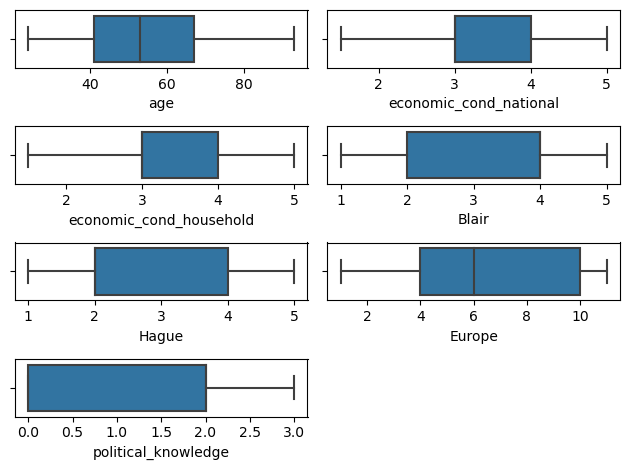

In [1757]:
for i in range(num_col.shape[1]):
    plt.subplot(4,2,i+1)
    sns.boxplot(num_col,x=num_col.columns[i])
    plt.tight_layout()
plt.savefig('ele1_without_outliers.png')

In [1787]:
#unscaled _data

In [1816]:
ele_data_merge=pd.concat([num_col,cat_col],axis=1)

In [1817]:
ele_data_merge=pd.get_dummies(ele_data_merge,columns=['gender'],drop_first=True,dtype='int')

In [1818]:
ele_data_merge.vote=pd.Categorical(ele_data_merge.vote).codes

In [1819]:
ele_data_merge.vote.value_counts()

1    1057
0     460
Name: vote, dtype: int64

# Unscaled Dataset

In [1810]:
ele_data_merge

age  economic_cond_national  economic_cond_household  Blair  Hague  \
0     43.0                     3.0                      3.0    4.0    1.0   
1     36.0                     4.0                      4.0    4.0    4.0   
2     35.0                     4.0                      4.0    5.0    2.0   
3     24.0                     4.0                      2.0    2.0    1.0   
4     41.0                     2.0                      2.0    1.0    1.0   
...    ...                     ...                      ...    ...    ...   
1520  67.0                     5.0                      3.0    2.0    4.0   
1521  73.0                     2.0                      2.0    4.0    4.0   
1522  37.0                     3.0                      3.0    5.0    4.0   
1523  61.0                     3.0                      3.0    1.0    4.0   
1524  74.0                     2.0                      3.0    2.0    4.0   

      Europe  political_knowledge  vote  gender_male  
0        2.0                  2.0     1            0  
1        5.0                  2.0     1            1  
2        3.0                  2.0     1            1  
3        4.0                  0.0     1            0  
4        6.0                  2.0     1            1  
...      ...                  ...   ...          ...  
1520    11.0                  3.0     0            1  
1521     8.0                  2.0     0            1  
1522     2.0                  2.0     1            1  
1523    11.0                  2.0     0            1  
1524    11.0                  0.0     0            0  

[1517 rows x 9 columns]

In [1941]:
x=ele_data_merge.drop('vote',axis=1)
y=ele_data_merge.vote

# Scaled Dataset

In [1860]:
ele_data_scaled=pd.concat([num_col,cat_col],axis=1)

In [1861]:
ele_data_scaled=pd.get_dummies(ele_data_scaled,columns=['gender'],drop_first=True,dtype='int')

In [1862]:
ele_data_scaled.vote=pd.Categorical(ele_data_scaled.vote).codes

In [1863]:
ele_data_scaled.age=(ele_data_scaled.age-ele_data_scaled.age.min())/(ele_data_scaled.age.max()-ele_data_scaled.age.min())

In [1864]:
ele_data_scaled

age  economic_cond_national  economic_cond_household  Blair  Hague  \
0     0.275362                     3.0                      3.0    4.0    1.0   
1     0.173913                     4.0                      4.0    4.0    4.0   
2     0.159420                     4.0                      4.0    5.0    2.0   
3     0.000000                     4.0                      2.0    2.0    1.0   
4     0.246377                     2.0                      2.0    1.0    1.0   
...        ...                     ...                      ...    ...    ...   
1520  0.623188                     5.0                      3.0    2.0    4.0   
1521  0.710145                     2.0                      2.0    4.0    4.0   
1522  0.188406                     3.0                      3.0    5.0    4.0   
1523  0.536232                     3.0                      3.0    1.0    4.0   
1524  0.724638                     2.0                      3.0    2.0    4.0   

      Europe  political_knowledge  vote  gender_male  
0        2.0                  2.0     1            0  
1        5.0                  2.0     1            1  
2        3.0                  2.0     1            1  
3        4.0                  0.0     1            0  
4        6.0                  2.0     1            1  
...      ...                  ...   ...          ...  
1520    11.0                  3.0     0            1  
1521     8.0                  2.0     0            1  
1522     2.0                  2.0     1            1  
1523    11.0                  2.0     0            1  
1524    11.0                  0.0     0            0  

[1517 rows x 9 columns]

In [1805]:
x.describe().T

count       mean        std   min   25%   50%   75%  \
age                      1517.0  54.241266  15.701741  24.0  41.0  53.0  67.0   
economic_cond_national   1517.0   3.257416   0.853647   1.5   3.0   3.0   4.0   
economic_cond_household  1517.0   3.159196   0.886279   1.5   3.0   3.0   4.0   
Blair                    1517.0   3.335531   1.174772   1.0   2.0   4.0   4.0   
Hague                    1517.0   2.749506   1.232479   1.0   2.0   2.0   4.0   
Europe                   1517.0   6.740277   3.299043   1.0   4.0   6.0  10.0   
political_knowledge      1517.0   1.540541   1.084417   0.0   0.0   2.0   2.0   
gender_male              1517.0   0.467370   0.499099   0.0   0.0   0.0   1.0   

                          max  
age                      93.0  
economic_cond_national    5.0  
economic_cond_household   5.0  
Blair                     5.0  
Hague                     5.0  
Europe                   11.0  
political_knowledge       3.0  
gender_male               1.0

In [1942]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [1943]:
print('Train Dataset X ',x_train.shape)
print('Train Dataset Y ',y_train.shape)

Train Dataset X  (1061, 8)
Train Dataset Y  (1061,)


In [1944]:
print('Test Dataset X ',x_test.shape)
print('Test Dataset Y ',y_test.shape)

Test Dataset X  (456, 8)
Test Dataset Y  (456,)


In [1945]:
from sklearn.linear_model import LogisticRegression

In [1946]:
log_model=LogisticRegression(random_state=1)
log_model.fit(x_train,y_train)
log_model.score(x_train,y_train)

0.8341187558906692

In [1947]:
log_model.score(X_test,Y_test)

0.7763157894736842

In [1948]:
grid={'penalty':['l1','l2','None'],'tol':[0.01,0.001,0.0001],'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
                                                                              ,'max_iter':[50,70,80,100,200]}

In [1949]:
grid_model=GridSearchCV(log_model,param_grid=grid,cv=5,n_jobs=2,verbose=True)

In [1950]:
grid_model.fit(x_train,y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=1), n_jobs=2,
             param_grid={'max_iter': [50, 70, 80, 100, 200],
                         'penalty': ['l1', 'l2', 'None'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga'],
                         'tol': [0.01, 0.001, 0.0001]},
             verbose=True)

In [1951]:
grid_model.best_estimator_

LogisticRegression(max_iter=50, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.01)

In [1952]:
grid_model.best_params_

{'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.01}

In [1986]:
best_model=LogisticRegression(penalty='l1',tol=0.01,solver='liblinear',max_iter=50,random_state=1)
best_model.fit(x_train,y_train)

LogisticRegression(max_iter=50, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.01)

In [1987]:
x=pd.DataFrame(best_model.coef_.T,index=x_train.columns,columns=['Import/Coeff'])
x

Import/Coeff
age                         -0.011221
economic_cond_national       0.698725
economic_cond_household      0.140960
Blair                        0.621018
Hague                       -0.790731
Europe                      -0.199595
political_knowledge         -0.287398
gender_male                  0.189402

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061



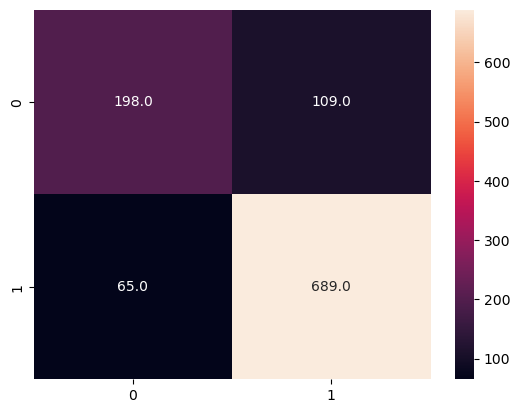

In [1989]:
y_pred_train=best_model.predict(x_train)
sns.heatmap(confusion_matrix(y_train,y_pred_train),annot=True,fmt='.1f')
print(classification_report(y_train,y_pred_train))

ROC AUC SCORE on train data is  0.8905295535644856


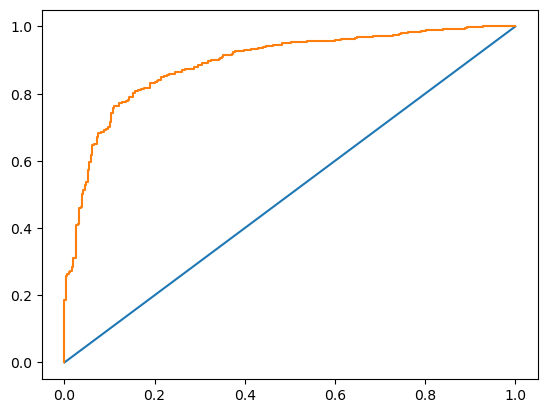

In [1990]:
prob=best_model.predict_proba(x_train)
probs = prob[:, 1]
rocauc_score=roc_auc_score(y_train,probs)
print('ROC AUC SCORE on train data is ',roc_auc_score(y_train,probs))
# calculate roc curve
train_fpr,train_tpr,threshold_lim=roc_curve(y_train,probs)
plt.plot([0,1],[0,1])
plt.plot(train_fpr,train_tpr);

              precision    recall  f1-score   support

           0       0.75      0.72      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



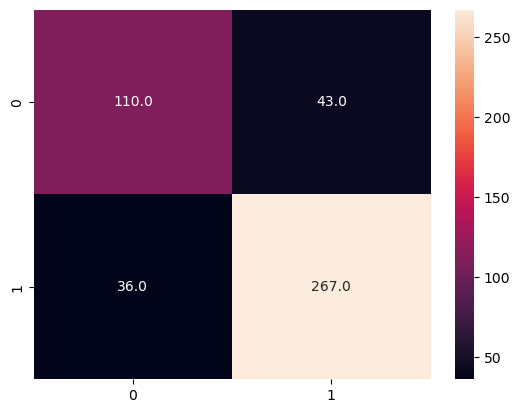

In [1992]:
y_pred_test=best_model.predict(x_test)
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True,fmt='.1f')
print(classification_report(y_test,y_pred_test))


ROC AUC SCORE is  0.8791388942815851


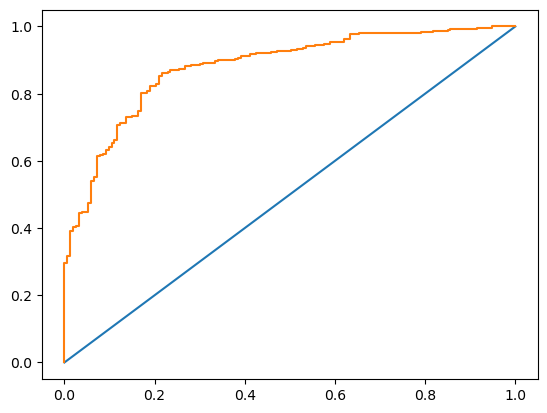

In [1993]:
prob=best_model.predict_proba(x_test)
probs = prob[:, 1]
rocauc_score=roc_auc_score(y_test,probs)
print('ROC AUC SCORE is ',roc_auc_score(y_test,probs))
# calculate roc curve
train_fpr,train_tpr,threshold_lim=roc_curve(y_test,probs)
plt.plot([0,1],[0,1])
plt.plot(train_fpr,train_tpr);

# Linear Discriminant Analysis

In [1959]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [1960]:
lda_model=LinearDiscriminantAnalysis()
lda_model.fit(x_train,y_train)
lda_model.score(x_train,y_train)

0.8341187558906692

In [1961]:
lda_model.score(x_test,y_test)

0.831140350877193

In [1962]:
x_train.columns

Index(['age', 'economic_cond_national', 'economic_cond_household', 'Blair',
       'Hague', 'Europe', 'political_knowledge', 'gender_male'],
      dtype='object')

In [1963]:
lda_model.coef_.T

array([[-0.0201834 ],
       [ 0.63313728],
       [ 0.06685438],
       [ 0.74136472],
       [-0.92725715],
       [-0.22367223],
       [-0.42879283],
       [ 0.14765058]])

In [1964]:
x=pd.DataFrame(lda_model.coef_.T,index=x_train.columns,columns=['Importance'])
x

Importance
age                       -0.020183
economic_cond_national     0.633137
economic_cond_household    0.066854
Blair                      0.741365
Hague                     -0.927257
Europe                    -0.223672
political_knowledge       -0.428793
gender_male                0.147651

In [1965]:
len(x_train.columns)

8

In [1966]:
# Equation for LDA
print('LDA Equation:','Vote =',lda_model.intercept_.round(3),'+',end='')
for i in range(len(x_train.columns)):
    if i != len(x_train.columns)-1:
        print('(',lda_model.coef_[0][i].round(3),')*',x_train.columns[i],'+',end='')
    else:
        print('(',lda_model.coef_[0][i].round(3),')*',x_train.columns[i])

LDA Equation: Vote = [2.488] +( -0.02 )* age +( 0.633 )* economic_cond_national +( 0.067 )* economic_cond_household +( 0.741 )* Blair +( -0.927 )* Hague +( -0.224 )* Europe +( -0.429 )* political_knowledge +( 0.148 )* gender_male


              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



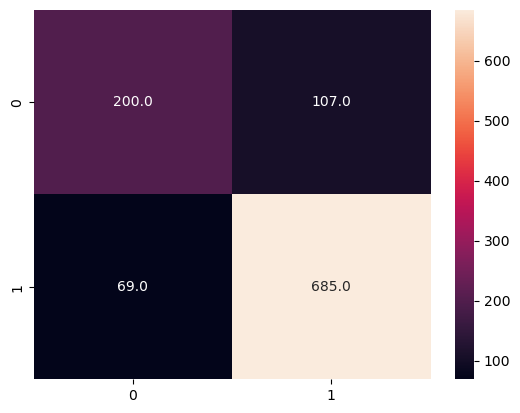

In [1967]:
y_train_pred=lda_model.predict(x_train)
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,fmt='.1f')
print(classification_report(y_train,y_train_pred))

ROC score for train data = 0.889942024728052


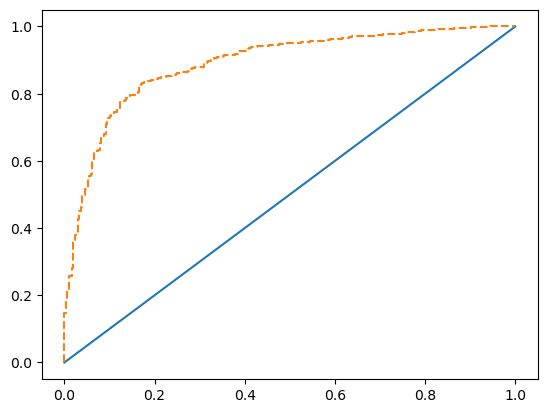

In [1968]:
prob=lda_model.predict_proba(x_train)
probs=prob[:,1]
print('ROC score for train data =',roc_auc_score(y_train,probs))
train_fpr,train_tpr,threshold_lim=roc_curve(y_train,probs)
plt.plot([0,1],[0,1])
plt.plot(train_fpr,train_tpr,linestyle='--');

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



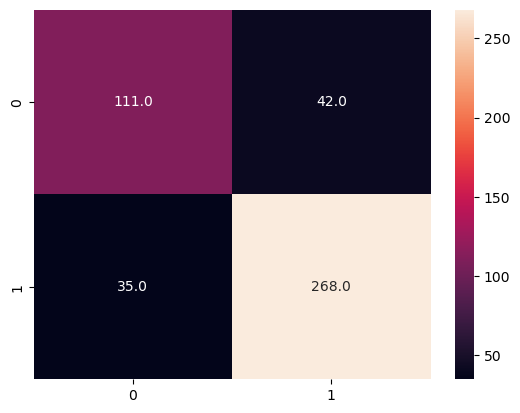

In [1969]:
y_test_pred=lda_model.predict(x_test)
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt='.1f')
print(classification_report(y_test,y_test_pred))

ROC AUC score for test data = 0.8875299294635347


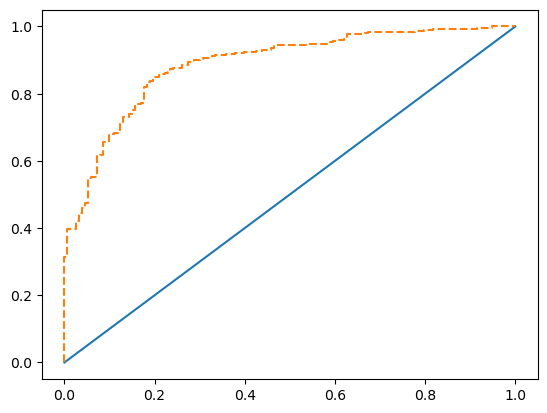

In [1972]:
prob=lda_model.predict_proba(x_test)
probs=prob[:,1]
print('ROC AUC score for test data =',roc_auc_score(y_test,probs))
test_fpr,test_tpr,threshold_lim=roc_curve(y_test,probs)
plt.plot([0,1],[0,1])
plt.plot(test_fpr,test_tpr,linestyle='--');

In [1878]:
from sklearn.naive_bayes import GaussianNB

In [1879]:
gau_model=GaussianNB()
gau_model.fit(x_train,y_train)

GaussianNB()

In [1880]:
gau_model.score(x_test,y_test)

0.8223684210526315

              precision    recall  f1-score   support

           0       0.72      0.69      0.71       307
           1       0.88      0.89      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



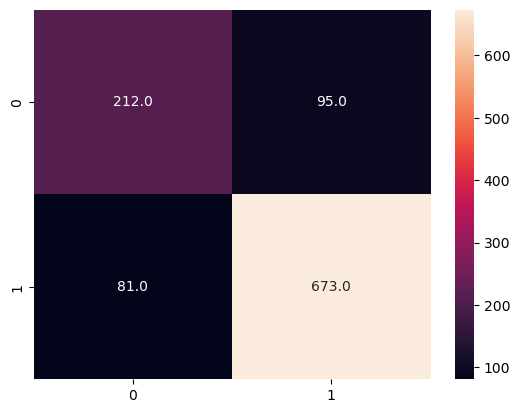

In [1881]:
y_pred_train=gau_model.predict(x_train)
sns.heatmap(confusion_matrix(y_train,y_pred_train),annot=True,fmt='.1f')
print(classification_report(y_train,y_pred_train))

ROC score for train data = 0.8890304910185849


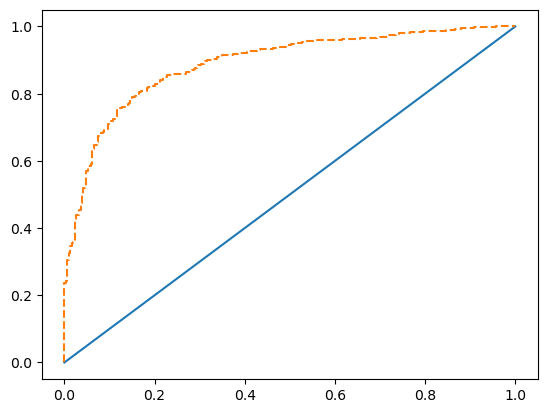

In [1973]:
prob=gau_model.predict_proba(x_train)
probs=prob[:,1]
print('ROC score for train data =',roc_auc_score(y_train,probs))
train_fpr,train_tpr,threshold_lim=roc_curve(y_train,probs)
plt.plot([0,1],[0,1])
plt.plot(train_fpr,train_tpr,linestyle='--');

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



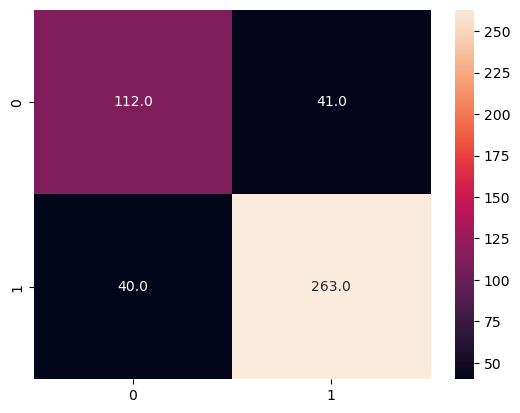

In [1884]:
y_test_pred=gau_model.predict(x_test)
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt='.1f')
print(classification_report(y_test,y_test_pred))

ROC AUC score for test data = 0.876442546215406


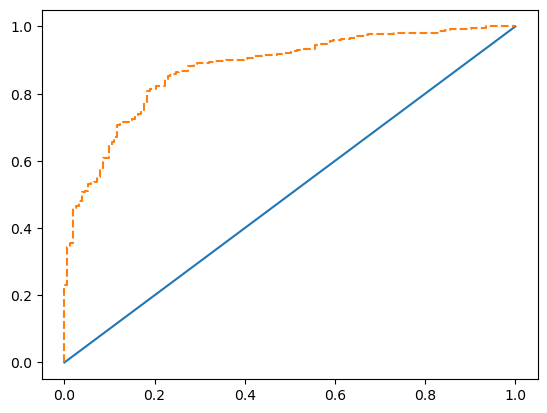

In [1974]:
prob=gau_model.predict_proba(x_test)
probs=prob[:,1]
print('ROC AUC score for test data =',roc_auc_score(y_test,probs))
test_fpr,test_tpr,threshold_lim=roc_curve(y_test,probs)
plt.plot([0,1],[0,1])
plt.plot(test_fpr,test_tpr,linestyle='--');

In [1865]:
X=ele_data_scaled.drop('vote',axis=1)
Y=ele_data_scaled.vote

In [1866]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [959]:
from sklearn.neighbors import KNeighborsClassifier

In [1867]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [1869]:
knn.score(X_train,Y_train)

0.8510838831291234

In [1868]:
knn.score(X_test,Y_test)

0.8092105263157895

              precision    recall  f1-score   support

           0       0.76      0.71      0.73       307
           1       0.89      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



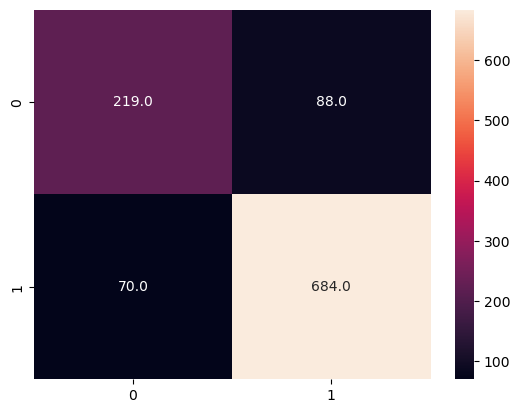

In [1874]:
Y_train_pred=knn.predict(X_train)
sns.heatmap(confusion_matrix(Y_train,Y_train_pred),annot=True,fmt='.1f')
print(classification_report(Y_train,Y_train_pred))

ROC AUC score for train data = 0.9280363576668192


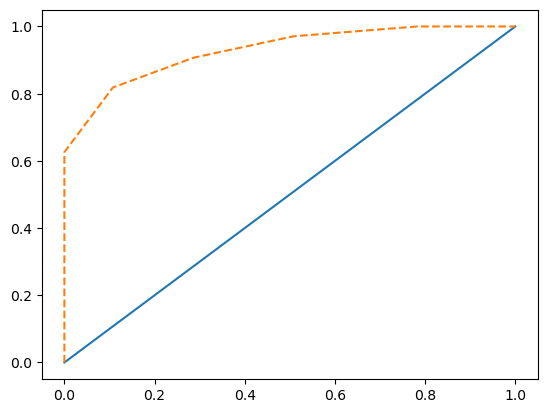

In [1976]:
prob=knn.predict_proba(X_train)
probs=prob[:,1]
print('ROC AUC score for train data =',roc_auc_score(Y_train,probs))
train_fpr,train_tpr,threshold_lim=roc_curve(Y_train,probs)
plt.plot([0,1],[0,1])
plt.plot(train_fpr,train_tpr,linestyle='--');

              precision    recall  f1-score   support

           0       0.72      0.70      0.71       153
           1       0.85      0.86      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.78       456
weighted avg       0.81      0.81      0.81       456



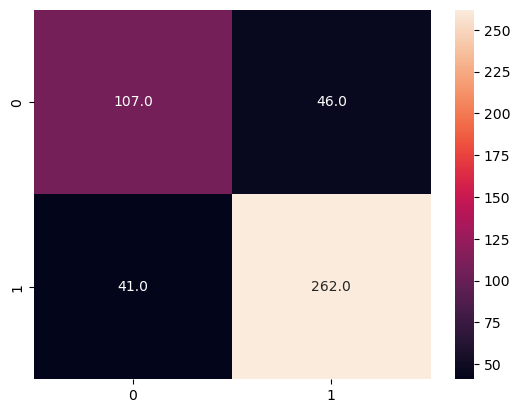

In [1876]:
Y_test_pred=knn.predict(X_test)
sns.heatmap(confusion_matrix(Y_test,Y_test_pred),annot=True,fmt='.1f')
print(classification_report(Y_test,Y_test_pred))

ROC AUC score for test data = 0.868137794171574


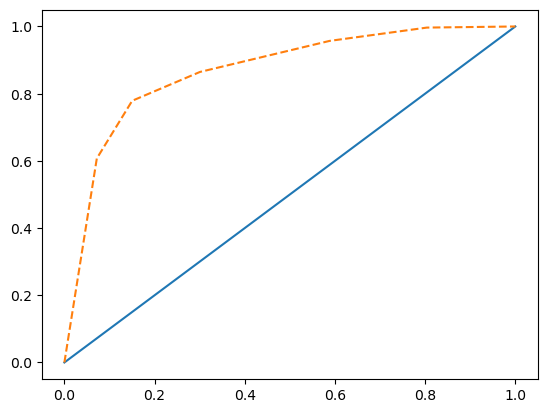

In [1977]:
prob=knn.predict_proba(X_test)
probs=prob[:,1]
print('ROC AUC score for test data =',roc_auc_score(Y_test,probs))
test_fpr,test_tpr,threshold_lim=roc_curve(Y_test,probs)
plt.plot([0,1],[0,1])
plt.plot(test_fpr,test_tpr,linestyle='--');

In [978]:
# Decision Tree

In [980]:
from sklearn.tree import DecisionTreeClassifier
dec_model=DecisionTreeClassifier(random_state=1)
dec_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

Train model score =  0.9990574929311969
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       739
           1       1.00      1.00      1.00       322

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



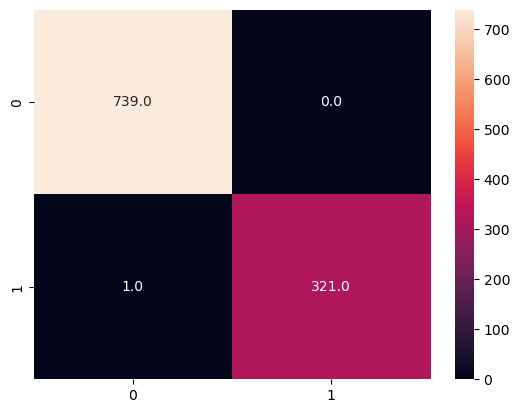

In [983]:
# Train Data
y_train_pred=dec_model.predict(x_train)
print('Train model score = ',dec_model.score(x_train,y_train))
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,fmt='.1f')
print(classification_report(y_train,y_train_pred))

Test model score =  0.7741228070175439
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       318
           1       0.61      0.70      0.65       138

    accuracy                           0.77       456
   macro avg       0.74      0.75      0.74       456
weighted avg       0.79      0.77      0.78       456



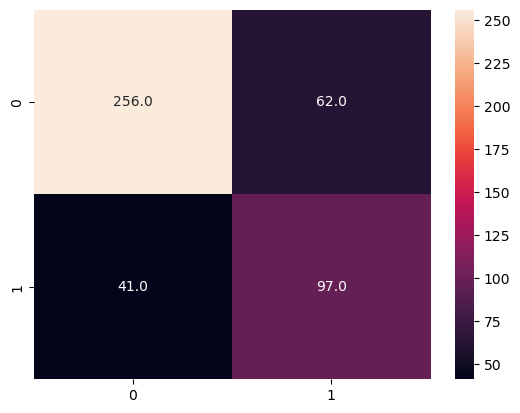

In [991]:
# Test Data
y_test_pred=dec_model.predict(x_test)
print('Test model score = ',dec_model.score(x_test,y_test))
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt='.1f')
print(classification_report(y_test,y_test_pred))

# BAGGING

In [987]:
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier

In [993]:
ran_model=RandomForestClassifier(random_state=1)
ran_model.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [1885]:
grid={'n_estimators':[10,20,50,100],'max_samples':[1,2,4,5],'max_features':[1,2,4,0]}
grid_model=GridSearchCV(estimator=bag_model,param_grid=grid,n_jobs=2,cv=3,verbose=True)
grid_model.fit(x_train,y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


GridSearchCV(cv=3,
             estimator=BaggingClassifier(estimator=RandomForestClassifier(random_state=1),
                                         random_state=1),
             n_jobs=2,
             param_grid={'max_features': [1, 2, 4, 0],
                         'max_samples': [1, 2, 4, 5],
                         'n_estimators': [10, 20, 50, 100]},
             verbose=True)

In [1887]:
 grid_model.best_params_

{'max_features': 4, 'max_samples': 5, 'n_estimators': 10}

In [ ]:
BaggingClassifier()

In [1897]:
bag_model=BaggingClassifier(estimator=ran_model,random_state=1)
bag_model.fit(x_train,y_train)

BaggingClassifier(estimator=RandomForestClassifier(random_state=1),
                  random_state=1)

Bagging model score for train data = 0.9613572101790764
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       307
           1       0.96      0.99      0.97       754

    accuracy                           0.96      1061
   macro avg       0.96      0.94      0.95      1061
weighted avg       0.96      0.96      0.96      1061



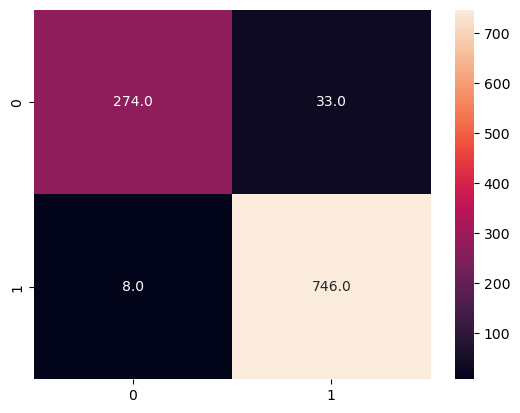

In [1898]:
y_train_pred=bag_model.predict(x_train)
print('Bagging model score for train data =',bag_model.score(x_train,y_train))
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,fmt='.1f')
print(classification_report(y_train,y_train_pred))

Bagging model ROC AUC Score for train data =  0.9957447360008295


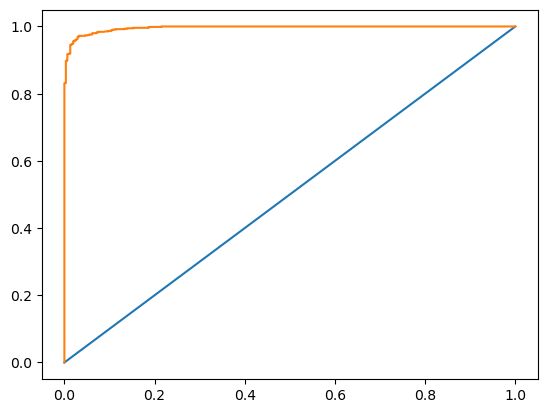

In [1978]:
prob=bag_model.predict_proba(x_train)
probs=prob[:,1]
print('Bagging model ROC AUC Score for train data = ',roc_auc_score(y_train,probs))
train_fpr, train_tpr, train_thresholds=roc_curve(y_train,probs)
plt.plot([0,1],[0,1])
plt.plot(train_fpr,train_tpr);

Bagging model score for test data = 0.831140350877193 

              precision    recall  f1-score   support

           0       0.80      0.67      0.73       153
           1       0.84      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



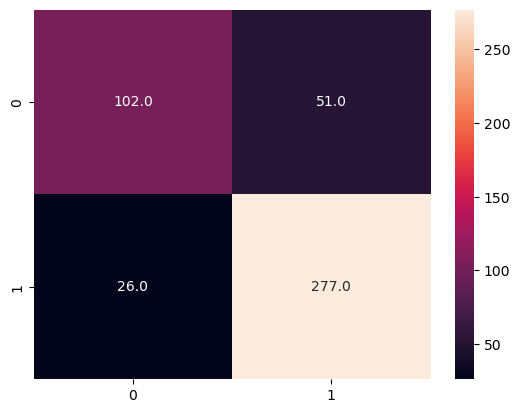

In [1899]:
y_test_pred=bag_model.predict(x_test)
print('Bagging model score for test data =',bag_model.score(x_test,y_test),'\n')
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt='.1f')
print(classification_report(y_test,y_test_pred))

Bagging model ROC AUC Score for test data =  0.8946806445350418


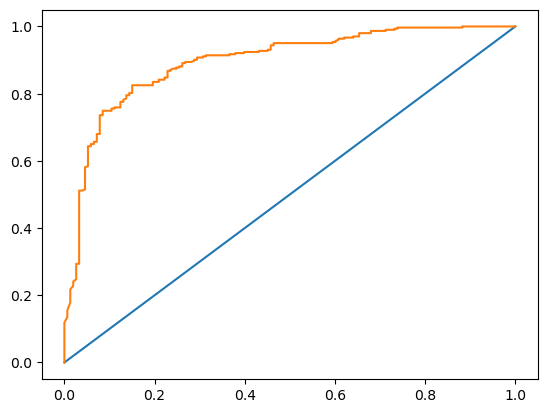

In [1979]:
prob=bag_model.predict_proba(x_test)
probs=prob[:,1]
print('Bagging model ROC AUC Score for test data = ',roc_auc_score(y_test,probs))
test_fpr, test_tpr, test_thresholds=roc_curve(y_test,probs)
plt.plot([0,1],[0,1])
plt.plot(test_fpr,test_tpr);

# BOOSTING 

In [1900]:
from sklearn.ensemble import GradientBoostingClassifier

In [1901]:
grad_model=GradientBoostingClassifier(random_state=1)
grad_model.fit(x_train,y_train)
print(grad_model.score(x_train,y_train))
print(grad_model.score(x_test,y_test))

0.8925541941564562
0.8355263157894737


In [1902]:
grid={'n_estimators':[50,100,150],'min_samples_leaf':[1,5,7,10],'max_depth':[3,5,7,10],'ccp_alpha':[0,0.1,0.01]}
grid_model=GridSearchCV(estimator=grad_model,param_grid=grid,n_jobs=2,cv=3,verbose=True)
grid_model.fit(x_train,y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=2,
             param_grid={'ccp_alpha': [0, 0.1, 0.01],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 5, 7, 10],
                         'n_estimators': [50, 100, 150]},
             verbose=True)

In [1903]:
grid_model.best_estimator_

GradientBoostingClassifier(ccp_alpha=0, min_samples_leaf=5, n_estimators=50,
                           random_state=1)

In [1904]:
grid_model.best_params_

{'ccp_alpha': 0, 'max_depth': 3, 'min_samples_leaf': 5, 'n_estimators': 50}

In [1905]:
best_grad_model=GradientBoostingClassifier(n_estimators=50,min_samples_leaf=5,max_depth=3,ccp_alpha=0,random_state=1)
best_grad_model.fit(x_train,y_train)
best_grad_model.score(x_train,y_train)

0.8746465598491989

Gradient Boosting model score for train data = 0.8746465598491989 

              precision    recall  f1-score   support

           0       0.82      0.72      0.77       307
           1       0.89      0.94      0.91       754

    accuracy                           0.87      1061
   macro avg       0.86      0.83      0.84      1061
weighted avg       0.87      0.87      0.87      1061



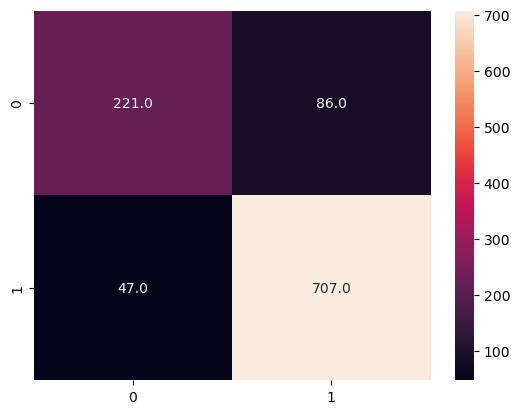

In [1913]:
y_train_pred=best_grad_model.predict(x_train)
print('Gradient Boosting model score for train data =',best_grad_model.score(x_train,y_train),'\n')
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,fmt='.1f')
print(classification_report(y_train,y_train_pred))

Gardient Boosting model ROC AUC Score for train data =  0.9326869076110904


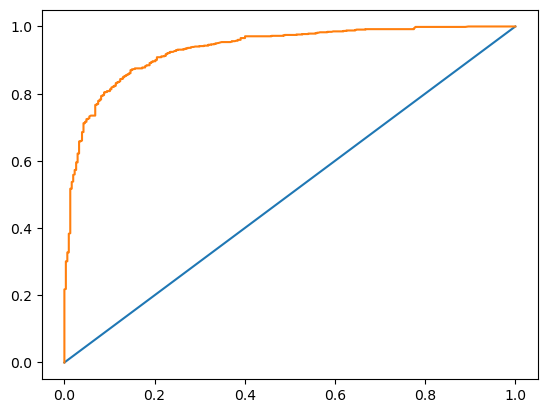

In [1982]:
prob=best_grad_model.predict_proba(x_train)
probs=prob[:,1]
print('Gardient Boosting model ROC AUC Score for train data = ',roc_auc_score(y_train,probs))
train_fpr, train_tpr, train_thresholds=roc_curve(y_train,probs)
plt.plot([0,1],[0,1])
plt.plot(train_fpr,train_tpr);

Gradient Boosting model score for test data = 0.831140350877193 

              precision    recall  f1-score   support

           0       0.80      0.67      0.73       153
           1       0.84      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



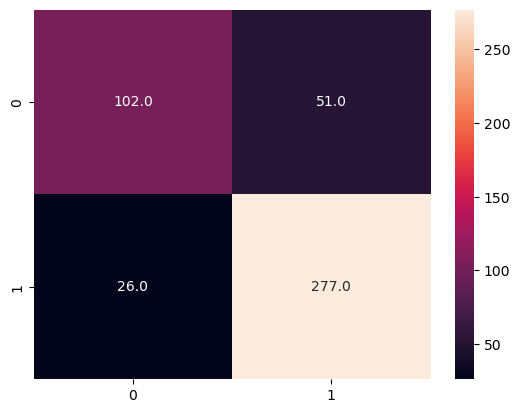

In [1915]:
y_test_pred=best_grad_model.predict(x_test)
print('Gradient Boosting model score for test data =',best_grad_model.score(x_test,y_test),'\n')
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt='.1f')
print(classification_report(y_test,y_test_pred))

Gradient Boosting model ROC AUC Score for test data =  0.8941869474067997


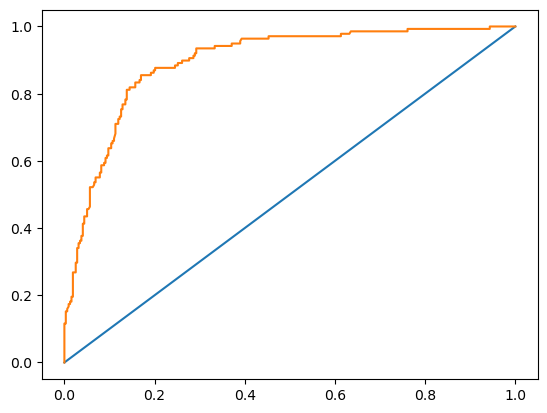

In [1028]:
prob=best_grad_model.predict_proba(x_test)
probs=prob[:,1]
print('Gradient Boosting model ROC AUC Score for test data = ',roc_auc_score(y_test,probs))
test_fpr, test_tpr, test_thresholds=roc_curve(y_test,probs)
plt.plot([0,1],[0,1])
plt.plot(test_fpr,test_tpr);

# AdaBoosting

In [1906]:
from sklearn.ensemble import AdaBoostClassifier

In [1907]:
ada_model=AdaBoostClassifier(random_state=1)
ada_model.fit(x_train,y_train)
print(ada_model.score(x_train,y_train))
print(ada_model.score(x_test,y_test))

0.8463713477851084
0.8135964912280702


In [1908]:
grid={'n_estimators':[30,50,70,80,100],'learning_rate':[1,2,3,4],'algorithm':['SAMME', 'SAMME.R']}
grid_model=GridSearchCV(estimator=ada_model,param_grid=grid,cv=3,n_jobs=2,verbose=True)
grid_model.fit(x_train,y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=1), n_jobs=2,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [1, 2, 3, 4],
                         'n_estimators': [30, 50, 70, 80, 100]},
             verbose=True)

In [1909]:
grid_model.best_estimator_

AdaBoostClassifier(algorithm='SAMME', learning_rate=1, n_estimators=30,
                   random_state=1)

In [1044]:
grid_model.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 100}

In [1910]:
best_ada_model=AdaBoostClassifier(n_estimators=30,algorithm='SAMME',learning_rate=1,random_state=1)
best_ada_model.fit(x_train,y_train)
print(best_ada_model.score(x_train,y_train))
print(best_ada_model.score(x_test,y_test))

0.8444863336475024
0.8201754385964912


Adaptive Boosting model score for train data = 0.8444863336475024 

              precision    recall  f1-score   support

           0       0.76      0.67      0.72       307
           1       0.87      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.82      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



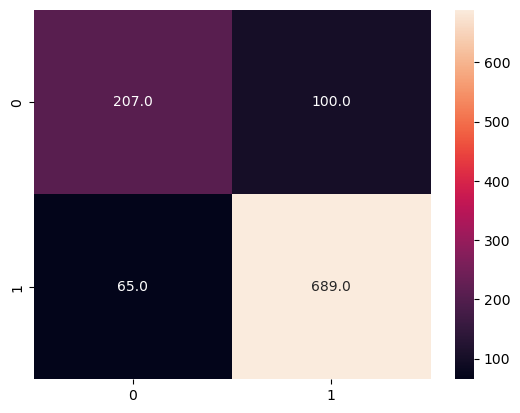

In [1911]:
y_train_pred=best_ada_model.predict(x_train)
print('Adaptive Boosting model score for train data =',best_ada_model.score(x_train,y_train),'\n')
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,fmt='.1f')
print(classification_report(y_train,y_train_pred))

Adaptive Boosting model ROC AUC Score for train data =  0.8991243228298154


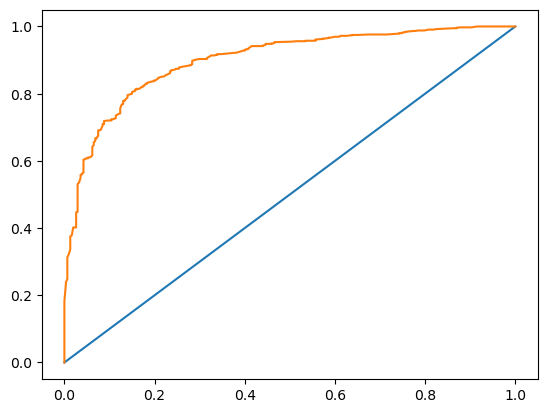

In [1980]:
prob=best_ada_model.predict_proba(x_train)
probs=prob[:,1]
print('Adaptive Boosting model ROC AUC Score for train data = ',roc_auc_score(y_train,probs))
train_fpr, train_tpr, train_thresholds=roc_curve(y_train,probs)
plt.plot([0,1],[0,1])
plt.plot(train_fpr,train_tpr);

Adaptive Boosting model score for test data = 0.8201754385964912 

              precision    recall  f1-score   support

           0       0.74      0.71      0.73       153
           1       0.86      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



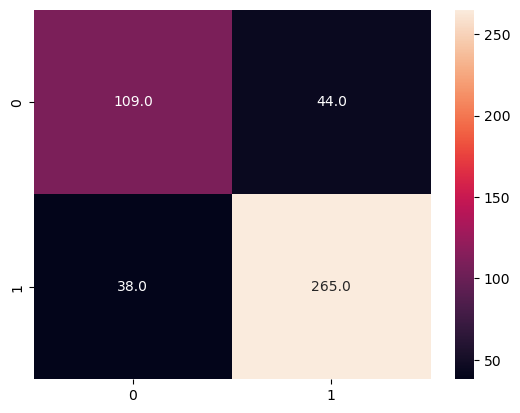

In [1912]:
y_test_pred=best_ada_model.predict(x_test)
print('Adaptive Boosting model score for test data =',best_ada_model.score(x_test,y_test),'\n')
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt='.1f')
print(classification_report(y_test,y_test_pred))

Adaptive Boosting model ROC AUC Score for test data =  0.8782976336849371


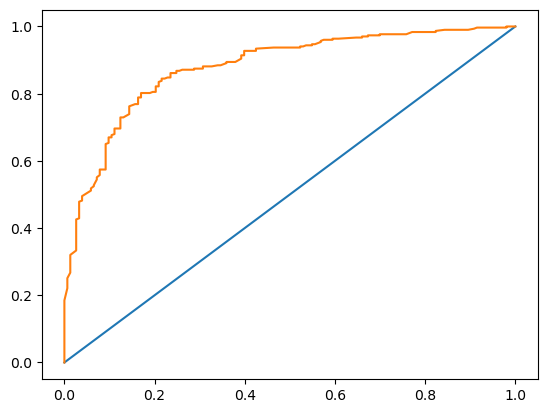

In [1981]:
prob=best_ada_model.predict_proba(x_test)
probs=prob[:,1]
print('Adaptive Boosting model ROC AUC Score for test data = ',roc_auc_score(y_test,probs))
test_fpr, test_tpr, test_thresholds=roc_curve(y_test,probs)
plt.plot([0,1],[0,1])
plt.plot(test_fpr,test_tpr);

# Question 2

# Sentiment Analysis

In [1079]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [1077]:
d=str(a+b+c)

In [1087]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [2106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')
import string
import nltk
import re

In [2107]:
speech=pd.read_excel('C:/Users/hp/desktop/python/Project_Speech.xlsx')

In [2108]:
speech.head()

Name                                             Speech
0  Roosevelt  On each national day of inauguration since 178...
1    Kennedy  Vice President Johnson, Mr. Speaker, Mr. Chief...
2      Nixon  Mr. Vice President, Mr. Speaker, Mr. Chief Jus...

In [2109]:
# Find the number of characters, words, and sentences for the mentioned documents

In [2110]:
speech['Totalwords']=[len(x.split()) for x in speech.Speech]
speech[['Speech','Totalwords']]
print('Total Words in Roosevelts Speech =',speech.Totalwords[0])
print('Total Words in Kennedy Speech =',speech.Totalwords[1])
print('Total Words in Nixon Speech =',speech.Totalwords[2])

Total Words in Roosevelts Speech = 1323
Total Words in Kennedy Speech = 1364
Total Words in Nixon Speech = 1769


In [2111]:
speech[['Name','Speech','Totalwords']]

Name                                             Speech  Totalwords
0  Roosevelt  On each national day of inauguration since 178...        1323
1    Kennedy  Vice President Johnson, Mr. Speaker, Mr. Chief...        1364
2      Nixon  Mr. Vice President, Mr. Speaker, Mr. Chief Jus...        1769

In [2112]:
speech['character_count']=speech.Speech.str.len()
speech[['Name','Speech','character_count']]

Name                                             Speech  \
0  Roosevelt  On each national day of inauguration since 178...   
1    Kennedy  Vice President Johnson, Mr. Speaker, Mr. Chief...   
2      Nixon  Mr. Vice President, Mr. Speaker, Mr. Chief Jus...   

   character_count  
0             7651  
1             7673  
2            10106

In [2113]:
speech['Sentences']=[len(x.split('\\n\\n')) for x in speech.Speech]
speech[['Name','Speech','Sentences']]

Name                                             Speech  Sentences
0  Roosevelt  On each national day of inauguration since 178...         38
1    Kennedy  Vice President Johnson, Mr. Speaker, Mr. Chief...         27
2      Nixon  Mr. Vice President, Mr. Speaker, Mr. Chief Jus...         51

In [2114]:
speech['speech_lower_case']=speech['Speech'].apply(lambda x: x.lower())

In [2115]:
speech['speech_lower_case']

0    on each national day of inauguration since 178...
1    vice president johnson, mr. speaker, mr. chief...
2    mr. vice president, mr. speaker, mr. chief jus...
Name: speech_lower_case, dtype: object

In [2116]:

speech['speech_punch_removed']=speech['speech_lower_case'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]','',x))

In [2117]:
speech['speech_stopword_removed']=speech['speech_punch_removed'].apply(lambda x: ' '.join(y for y in x.split() if y not in stop))

In [2118]:
speech['speech_stopword_removed_totalwords']=speech['speech_stopword_removed'].apply(lambda x:len(x.split()))
speech[['Name','Speech','speech_stopword_removed','Totalwords','speech_stopword_removed_totalwords']]

Name                                             Speech  \
0  Roosevelt  On each national day of inauguration since 178...   
1    Kennedy  Vice President Johnson, Mr. Speaker, Mr. Chief...   
2      Nixon  Mr. Vice President, Mr. Speaker, Mr. Chief Jus...   

                             speech_stopword_removed  Totalwords  \
0  national day inauguration since 1789 people re...        1323   
1  vice president johnson mr speaker mr chief jus...        1364   
2  mr vice president mr speaker mr chief justice ...        1769   

   speech_stopword_removed_totalwords  
0                                 624  
1                                 689  
2                                 819

In [2119]:
speech[['Speech','speech_stopword_removed']]

Speech  \
0  On each national day of inauguration since 178...   
1  Vice President Johnson, Mr. Speaker, Mr. Chief...   
2  Mr. Vice President, Mr. Speaker, Mr. Chief Jus...   

                             speech_stopword_removed  
0  national day inauguration since 1789 people re...  
1  vice president johnson mr speaker mr chief jus...  
2  mr vice president mr speaker mr chief justice ...

In [2120]:
from nltk.stem import SnowballStemmer # PorterStemmer
st = SnowballStemmer('english')
speech['speech_Clean_Stemmed'] = speech['speech_stopword_removed'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [2101]:
speech['speech_Clean_Stemmed'][0]

'nation day inaugur sinc 1789 peopl renew sens dedic unit statesnnin washington day task peopl creat weld togeth nationnnin lincoln day task peopl preserv nation disrupt withinnnin day task peopl save nation institut disrupt withoutnnto us come time midst swift happen paus moment take stock recal place histori rediscov may risk real peril inactionnnl nation determin count year lifetim human spirit life man threescor year ten littl littl less life nation full measur livennther men doubt men believ democraci form govern frame life limit measur kind mystic artifici fate unexplain reason tyranni slaveri becom surg wave futur freedom eb tidennbut american know truenneight year ago life republ seem frozen fatalist terror prove true midst shock act act quick bold decisivelynnthes later year live year fruit year peopl democraci brought us greater secur hope better understand life ideal measur materi thingsnnmost vital present futur experi democraci success surviv crisi home put away mani evil 

In [2126]:
all_words_cleaned=[i for i in ''.join(speech['speech_Clean_Stemmed'][0]).split()]

In [2128]:
t = pd.DataFrame(nltk.FreqDist(all_words_cleaned),index=[0])
final_word_analysis = t.T
final_word_analysis = final_word_analysis.reset_index()
final_word_analysis.columns = ['Words','Frequency']
final_word_analysis = final_word_analysis.sort_values(by="Frequency",ascending = False)
final_word_analysis.head(3)

Words  Frequency
0   nation         16
82    know         10
24      us          8

In [2129]:
all_words_cleaned2=[i for i in ''.join(speech['speech_Clean_Stemmed'][1]).split()]

In [2130]:
t = pd.DataFrame(nltk.FreqDist(all_words_cleaned2),index=[0])
final_word_analysis = t.T
final_word_analysis = final_word_analysis.reset_index()
final_word_analysis.columns = ['Words','Frequency']
final_word_analysis = final_word_analysis.sort_values(by="Frequency",ascending = False)
final_word_analysis.head(3)

Words  Frequency
70     let         11
108     us         11
46   power          9

In [2131]:
all_words_cleaned3=[i for i in ''.join(speech['speech_Clean_Stemmed'][2]).split()]

In [2136]:
all_words_cleaned3

['mr',
 'vice',
 'presid',
 'mr',
 'speaker',
 'mr',
 'chief',
 'justic',
 'senat',
 'cook',
 'mrs',
 'eisenhow',
 'fellow',
 'citizen',
 'great',
 'good',
 'countri',
 'share',
 'togethernnwhen',
 'met',
 'four',
 'year',
 'ago',
 'america',
 'bleak',
 'spirit',
 'depress',
 'prospect',
 'seem',
 'endless',
 'war',
 'abroad',
 'destruct',
 'conflict',
 'homenna',
 'meet',
 'today',
 'stand',
 'threshold',
 'new',
 'era',
 'peac',
 'worldnnth',
 'central',
 'question',
 'us',
 'shall',
 'use',
 'peac',
 'let',
 'us',
 'resolv',
 'era',
 'enter',
 'postwar',
 'period',
 'often',
 'time',
 'retreat',
 'isol',
 'lead',
 'stagnat',
 'home',
 'invit',
 'new',
 'danger',
 'abroadnnlet',
 'us',
 'resolv',
 'becom',
 'time',
 'great',
 'respons',
 'great',
 'born',
 'renew',
 'spirit',
 'promis',
 'america',
 'enter',
 'third',
 'centuri',
 'nationnnthi',
 'past',
 'year',
 'saw',
 'farreach',
 'result',
 'new',
 'polici',
 'peac',
 'continu',
 'revit',
 'tradit',
 'friendship',
 'mission',
 '

In [2132]:
t = pd.DataFrame(nltk.FreqDist(all_words_cleaned3),index=[0])
final_word_analysis = t.T
final_word_analysis = final_word_analysis.reset_index()
final_word_analysis.columns = ['Words','Frequency']
final_word_analysis = final_word_analysis.sort_values(by="Frequency",ascending = False)
final_word_analysis.head(3)

Words  Frequency
43       us         26
21  america         19
62  respons         16

In [2138]:
wc_a=speech['speech_Clean_Stemmed'][0]

Word Cloud for Roosevelt Speech (after cleaning)!!


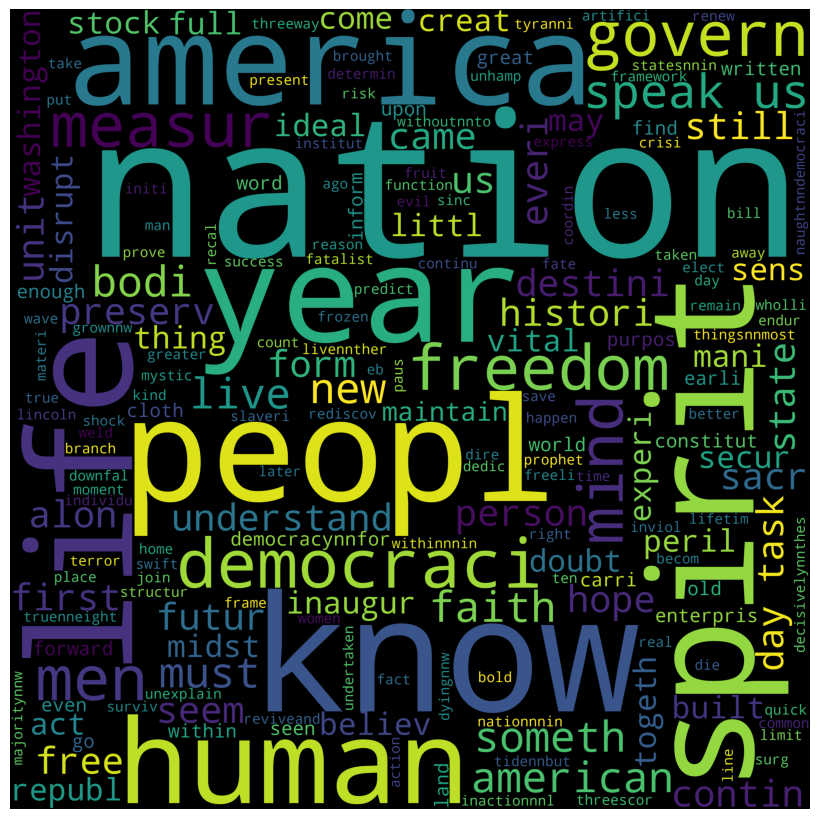

In [2140]:

# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_a) # can add stopwords argument here
#stopwords=['http','bitly']
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Roosevelt Speech (after cleaning)!!")
plt.show()

#Tip: You can specify stopwords, regex (punctuations/symbols) in the wordcloud itself, check CTRL+TAB on the wordcloud fuction!

Word Cloud for Kennedy Speech (after cleaning)!!


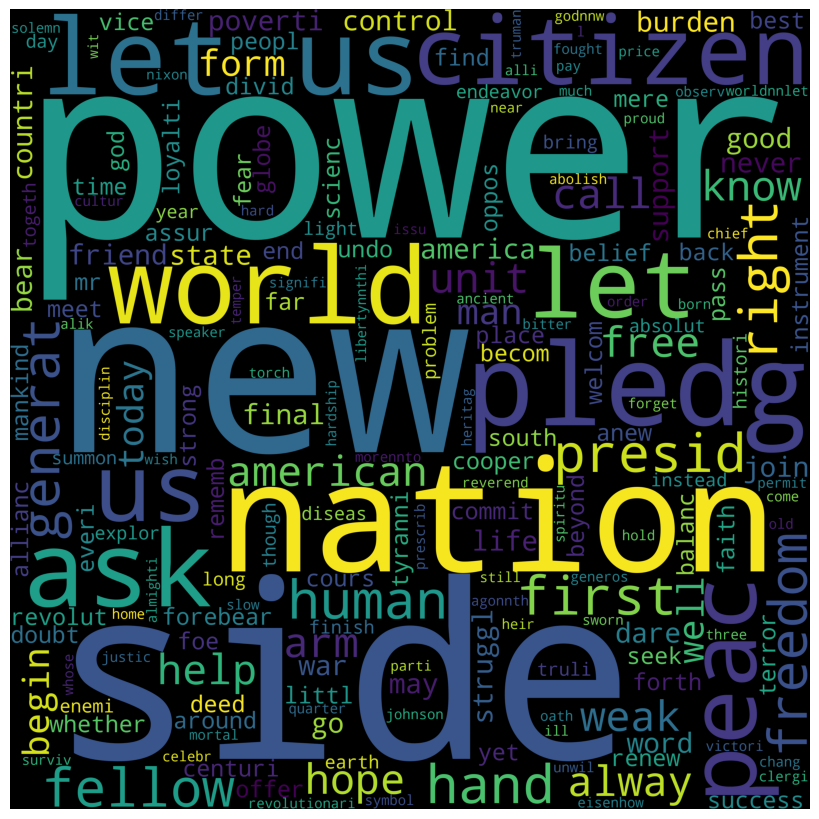

In [2142]:
wc_a=speech['speech_Clean_Stemmed'][1]
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_a) # can add stopwords argument here
#stopwords=['http','bitly']
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Kennedy Speech (after cleaning)!!")
plt.show()

Word Cloud for Nixon Speech (after cleaning)!!


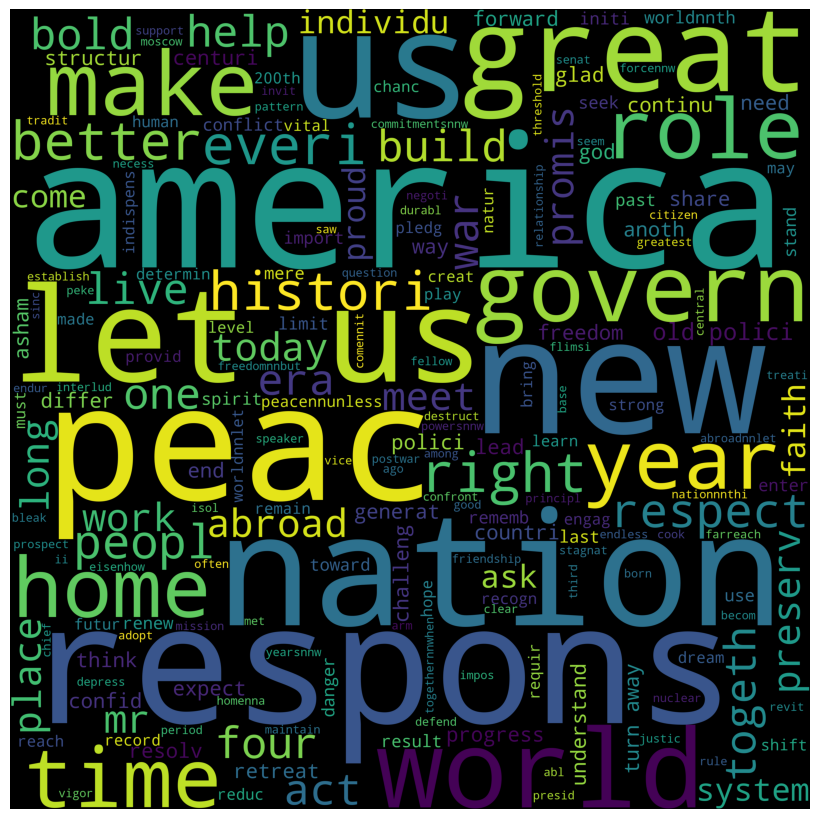

In [2143]:
wc_a=speech['speech_Clean_Stemmed'][2] 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_a) 
                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Nixon Speech (after cleaning)!!")
plt.show()